# Exploratory Data Analysis

@roman

20 July 2024

In [50]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from INEGIpy import MarcoGeoestadistico
from dotenv import load_dotenv
import h3
from shapely.geometry import Polygon


In [4]:
# Settings
# show 100 columns in pandas
pd.set_option('display.max_columns', 500)

# Load environment variables
load_dotenv()

# inegi class
inegi_api = MarcoGeoestadistico()

---
# Data

## Properties

### Read

In [5]:
# read database
gdf_properties = pd.read_parquet("../../data/clean/properties_shif.parquet")

# see
print(gdf_properties.shape)
gdf_properties.head(2)

(852913, 92)


property_id  valor_fisico_construccion fecha_avaluo  \
0  66cf10199ef943a5a5ff82129e53d5d7                 1611371.52   2020-05-27   
1  f84f9a0c784f491eab6bb100b513a95b                  460588.28   2020-07-23   

  colonia  id_clase_inmueble  id_tipo_inmueble  conservacion  elevador  \
0      SD                  4                 2           4.0       1.0   
1      SD                  3                 2           4.0       2.0   

   niveles  cve_ref_proximidad_urbana  cve_nivel_equipamiento_urbano  \
0        4                          1                              1   
1        3                          2                              1   

   valor_mercado  valor_concluido_total  nivel unidades_rentables  edad_anios  \
0        4305275                4305000      3                  1          25   
1        1351682                1352000      3                  1          25   

   vida_util_remanente  cve_clasificacion_zona  cve_vigilancia  \
0                   45                       4             NaN   
1                   35                       3             NaN   

    regimen_propiedad  tipo_vialidad id_municipio id_entidad_f     cp  \
0  PRIVADA INDIVIDUAL            NaN          003           09   4600   
1  PRIVADA INDIVIDUAL            NaN          058           15  57100   

   recamaras  banos  medio_banos  estacionamiento  superficie_terreno  \
0          2      1            0                0                 143   
1          2      2            0                1                 113   

   superficie_construida  superficie_accesoria  superficie_vendible  \
0                    348                     0                  348   
1                    108                     0                  108   

   valor_fisico_terreno_m2 property_type  city_cluster  distance_to_ocean  \
0                   8918.0         house             0                inf   
1                   6151.0         house             0                inf   

  ocean_label   longitud    latitud           hex_id  \
0    no_ocean -99.158103  19.310875  884995843dfffff   
1    no_ocean -99.065361  19.491722  884995b937fffff   

   count_supermarkets_at_1km  count_hospitals_at_5km  count_metro_at_1km  \
0                          2                      12                   0   
1                          0                       4                   0   

   count_schools_at_1km  count_restaurants_at_1km  tam_loc  est_socio  \
0                     0                         7      1.0   3.013230   
1                     0                         0      1.0   2.285681   

   clase_hog  sexo_jefe  edad_jefe  educa_jefe  tot_integ   mayores   menores  \
0        2.0        1.0  58.136311    7.407384   3.354268  3.087852  0.266416   
1        2.0        1.0  54.057086    6.417843   3.432375  2.914384  0.517991   

     p12_64    p65mas  percep_ing       ing_cor    estim_alqu  otros_ing  \
0  2.530407  0.557445    2.304929  75369.418453  19406.663415   63.30374   
1  2.510109  0.404276    1.823614  40971.566919   7871.843365    0.00000   

      gasto_mon     vivienda     alquiler    pred_cons     cuidados  tipo_viv  \
0  38291.006045  4776.178204  1440.647648  1041.558150  2150.355388       1.0   
1  28258.184054  3447.830493  1470.603904   318.300184  1058.354233       1.0   

   antiguedad  cuart_dorm  tenencia       renta   estim_pago    pago_viv  \
0   25.374837    2.436469       4.0  515.588974  6647.702081  205.642062   
1   22.396067    2.165129       4.0  515.829785  2680.040383    0.000000   

   pago_mesp  tipo_adqui  viv_usada  tipo_finan  escrituras  tot_resid  \
0   0.139590         1.0   0.147720         5.0         1.0   3.378298   
1   0.193193         2.0   0.101267         5.0         1.0   3.471221   

    tot_hom   tot_muj   tot_hog  total_viviendas  lag_year_inpc  \
0  1.550932  1.827366  1.000000         225095.0        103.233   
1  1.658298  1.812923  1.011099         309044.0        103.687   

   lag_3months_em_avg_pct_ch

In [6]:
# see columns
print(gdf_properties.columns.tolist())

['property_id', 'valor_fisico_construccion', 'fecha_avaluo', 'colonia', 'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'elevador', 'niveles', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano', 'valor_mercado', 'valor_concluido_total', 'nivel', 'unidades_rentables', 'edad_anios', 'vida_util_remanente', 'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad', 'tipo_vialidad', 'id_municipio', 'id_entidad_f', 'cp', 'recamaras', 'banos', 'medio_banos', 'estacionamiento', 'superficie_terreno', 'superficie_construida', 'superficie_accesoria', 'superficie_vendible', 'valor_fisico_terreno_m2', 'property_type', 'city_cluster', 'distance_to_ocean', 'ocean_label', 'longitud', 'latitud', 'hex_id', 'count_supermarkets_at_1km', 'count_hospitals_at_5km', 'count_metro_at_1km', 'count_schools_at_1km', 'count_restaurants_at_1km', 'tam_loc', 'est_socio', 'clase_hog', 'sexo_jefe', 'edad_jefe', 'educa_jefe', 'tot_integ', 'mayores', 'menores', 'p12_64', 'p65mas', 'percep_ing', 'i

### Wrangle

In [7]:
# integer columns
columns_to_integer = [
    'sexo_jefe', 'tipo_viv', 'tenencia',
    'tipo_adqui', 'tipo_finan', 'escrituras',
    'clase_hog', 'cve_vigilancia'
]

# to int (downcast)
gdf_properties[columns_to_integer] = gdf_properties[columns_to_integer].astype('float').round().astype('Int64')

In [8]:
# convert some columns to category
columns_categorical = list(set([
    'property_id', 'regimen_propiedad',  'hex_id',
    'colonia', 'id_clase_inmueble', 'id_tipo_inmueble',
    'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
    'conservacion', 'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad',
    'tipo_vialidad', 'id_municipio', 'id_entidad_f', 'cp', 'property_type', 'city_cluster',
    'ocean_label',
    'sexo_jefe', 'tipo_viv', 'tenencia',
    'tipo_adqui', 'tipo_finan', 'escrituras',
    'clase_hog',
]))

# convert to category
gdf_properties[columns_categorical] = gdf_properties[columns_categorical].astype('str')


In [10]:
# objective variable
gdf_properties['price_per_sqm'] = gdf_properties['valor_mercado'] / gdf_properties['superficie_vendible']

In [11]:
# count of dtypes
gdf_properties.dtypes.value_counts()

float64           47
object            26
int64             19
datetime64[ns]     1
Name: count, dtype: int64

In [12]:
# see nan values
gdf_properties.isna().sum()[gdf_properties.isna().sum() > 0]

elevador                                              28367
competitors_weighted_mean_log_price_per_sqm          122086
competitors_weighted_mean_log_price_per_sqm_lower    122086
competitors_weighted_mean_log_price_per_sqm_upper    122086
dtype: int64

In [13]:
# nan or S/D inputation (WIP)
gdf_properties['elevador'] = gdf_properties['elevador'].fillna(0)
gdf_properties['cve_vigilancia'] = gdf_properties['cve_vigilancia'].fillna('0')

## Cities

<Axes: >

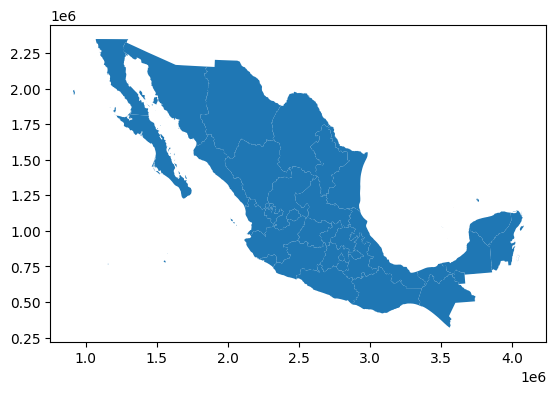

In [14]:
# read country shape
gdf_mexico = inegi_api.Entidades()

# change crs to 6372
gdf_mexico = gdf_mexico.to_crs(epsg=6372)
gdf_mexico.plot()

(158, 4)


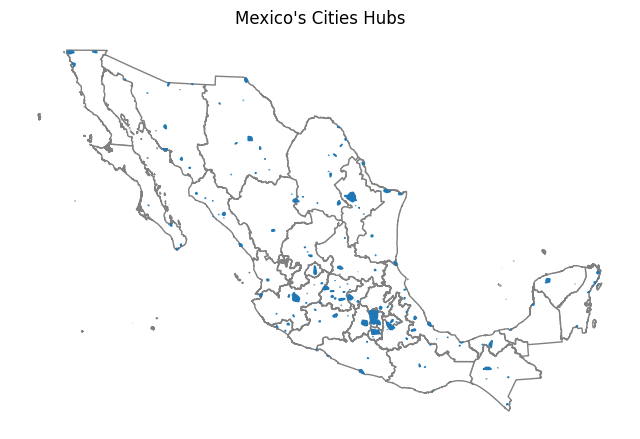

In [15]:
# read cities
gdf_cities = gpd.read_parquet("../../data/misc/polygons_cities_analysis.parquet")

# see
print(gdf_cities.shape)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf_mexico.plot(ax=ax, color="white", edgecolor="gray")
gdf_cities.plot(ax=ax, color="C0", edgecolor="C0")
# title
plt.title("Mexico's Cities Hubs")
# no axis
plt.axis("off")
plt.show()

---
# General EDA

## NaNs

In [14]:
# cols in nan
gdf_properties.isna().mean()[gdf_properties.isna().mean().gt(0)].sort_values(ascending=False)

competitors_weighted_mean_log_price_per_sqm          0.14314
competitors_weighted_mean_log_price_per_sqm_lower    0.14314
competitors_weighted_mean_log_price_per_sqm_upper    0.14314
dtype: float64

## Observations

In [ ]:
# number of observations
print(f"Number of observations: {gdf_properties.shape[0]}")

Number of observations: 852913


In [29]:
# read txt files
def read_and_convert_to_dataframe(file_path):
    """
    Reads a text file and converts it into a pandas DataFrame with 'category' and 'description' columns.

    Parameters:
        file_path (str): The path to the text file.

    Returns:
        pd.DataFrame: A DataFrame with the formatted content.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        data = []
        for line in lines:
            line = line.strip()  # Remove leading/trailing whitespace
            if line and not line.startswith('#'):  # Skip empty lines and comments
                parts = line.split(' ', 1)  # Split on the first space
                if len(parts) == 2:
                    category, description = parts
                    if category.isdigit():  # Ensure category is a number
                        data.append((int(category), description.strip()))

        # Create DataFrame
        df = pd.DataFrame(data, columns=['category', 'description'])

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error


In [31]:
# number of observations by id_tipo_inmueble
# read txt files
table_property_type = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CAT_TIPO_INMUEBLE.txt")

# count
(
    gdf_properties['id_tipo_inmueble']
    .value_counts()
    .reset_index()
    .merge(
        table_property_type,
        left_on='id_tipo_inmueble',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
)

description   count  percentage
0             CASA HABITACIÓN  415622    0.487297
1          CASA EN CONDOMINIO  229944    0.269598
2  DEPARTAMENTO EN CONDOMINIO  207347    0.243105

In [46]:
# number of observatios by id_clase_inmueble
# read txt files
table_property_class = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CVE_CLASE_INMUEBLE, CVE_CLASE_GENERAL_INMUEBLES_ZONA Cat.ClasesConstruccion.txt")

# count
(
    gdf_properties['id_clase_inmueble']
    .value_counts()
    .reset_index()
    .merge(
        table_property_class,
        left_on='id_clase_inmueble',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'id_clase_inmueble', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
    .sort_values(by='count', ascending=False)
)

description  id_clase_inmueble   count  percentage
0    Interés Social                  3  478697    0.561250
1             Media                  4  309399    0.362756
2          Semilujo                  5   42205    0.049483
3         Económica                  2   13852    0.016241
4       Residencial                  6    7631    0.008947
5  Residencial Plus                  7    1129    0.001324

## Time Range

In [84]:
# range of fecha_avaluo
gdf_properties['fecha_avaluo'].describe()

count                           852913
mean     2021-05-03 20:17:26.748730624
min                2019-01-01 00:00:00
25%                2020-02-14 00:00:00
50%                2021-04-21 00:00:00
75%                2022-07-15 00:00:00
max                2023-12-31 00:00:00
Name: fecha_avaluo, dtype: object

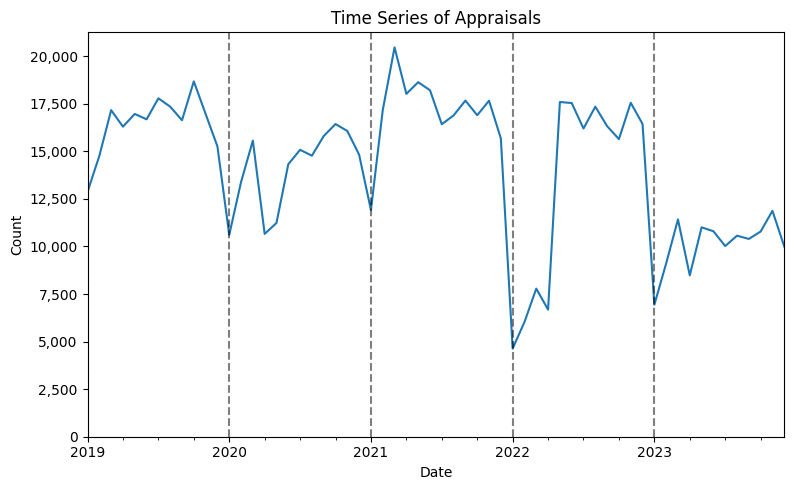

In [92]:
# time series of counts by each month and year
ts_counts = (
    gdf_properties
    ['fecha_avaluo'].dt.to_period('M')
    .value_counts()
    .sort_index()
    .to_frame()
    # add missing months
    .reindex(pd.period_range(
        start=gdf_properties['fecha_avaluo'].min().to_period('M'),
        end=gdf_properties['fecha_avaluo'].max().to_period('M'),
        freq='M'
        ))
    .fillna(0)
    )

# plot time series
ts_counts.plot(figsize=(8, 5))

# add line each beginning of year
for year in range(gdf_properties['fecha_avaluo'].dt.year.min(), gdf_properties['fecha_avaluo'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Appraisals")
# labels
plt.xlabel("Date")
plt.ylabel("Count")

# don't show legend
plt.legend().remove()

# tight
plt.tight_layout()

# y limits
plt.ylim(0, None)

# Count in thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# show
plt.show()

## Geospatial

In [59]:
# cout by ID_ENTIDAD_F
table_properties_by_state = (
    gdf_properties['id_entidad_f']
    .value_counts(normalize=True)
    .sort_index()
    )


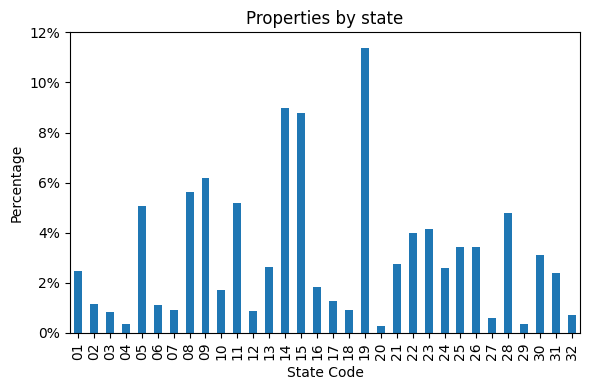

In [66]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
table_properties_by_state.plot(kind='bar')

# title
plt.title("Properties by state")

# percentage
plt.xlabel("State Code")
plt.ylabel("Percentage")
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x:.0%}')
plt.ylim(0, 0.12)

# tight layout
plt.tight_layout()

# show
plt.show()

Text(0.5, 1.0, 'Propertion of Observations')

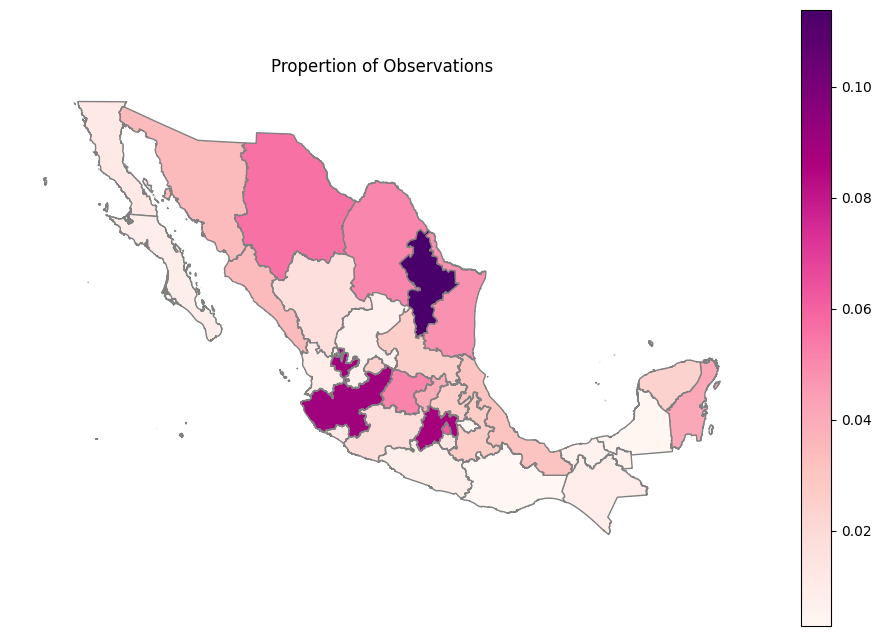

In [81]:
# plot map 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    gdf_mexico
    .merge(
        table_properties_by_state.reset_index(),
        left_on='cvegeo',
        right_on='id_entidad_f',
        how='left'
    )
    .plot('proportion', legend=True, ax=ax, cmap='RdPu', edgecolor='gray')
)

# dont show axis
plt.axis('off')

# title
plt.title('Proportion of Observations')

---
# Analysis $Y$

In [29]:
# describe
gdf_properties['price_per_sqm'].describe()

count    852913.000000
mean      14505.788680
std        9102.062864
min        4700.818182
25%        9761.904762
50%       11895.666667
75%       15535.795918
max      248687.500000
Name: price_per_sqm, dtype: float64

In [35]:
# 3 types of mean: arithmetic, harmonic, geometric
# arithmetic
print(f"arithmetic: {gdf_properties['price_per_sqm'].mean()}")
# geometric
print(f"geometric: {np.exp(gdf_properties['price_per_sqm'].apply(np.log).mean())}")
# harmonic
print(f"harmonic: {gdf_properties.shape[0] / gdf_properties['price_per_sqm'].apply(lambda x: 1/x).sum()}")

arithmetic: 14505.788680013331
geometric: 12927.366110734758
harmonic: 11926.490235001866


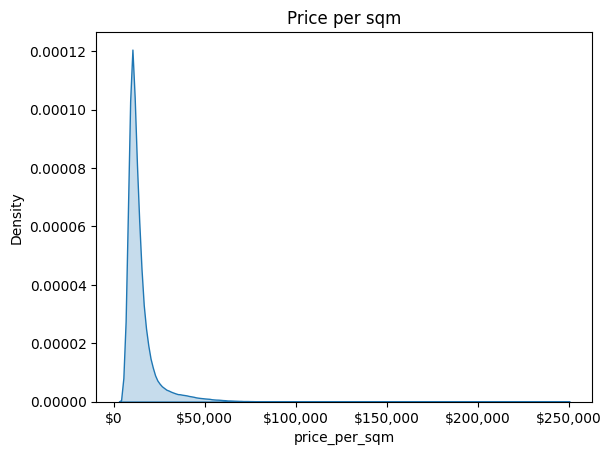

In [187]:
# distribution
sns.kdeplot(gdf_properties, x='price_per_sqm', fill=True)

# title
plt.title("Price per sqm")

# x ticks in thousands and money
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

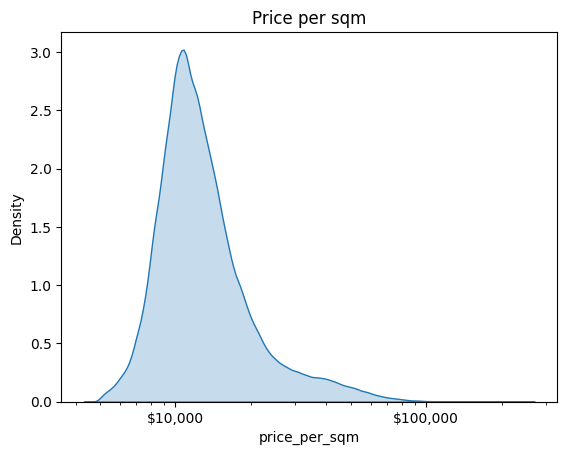

In [188]:
# distribution
sns.kdeplot(gdf_properties, x='price_per_sqm', fill=True, log_scale=True)

# title
plt.title("Price per sqm")

# x ticks in thousands and money
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_4961/1822887790.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))


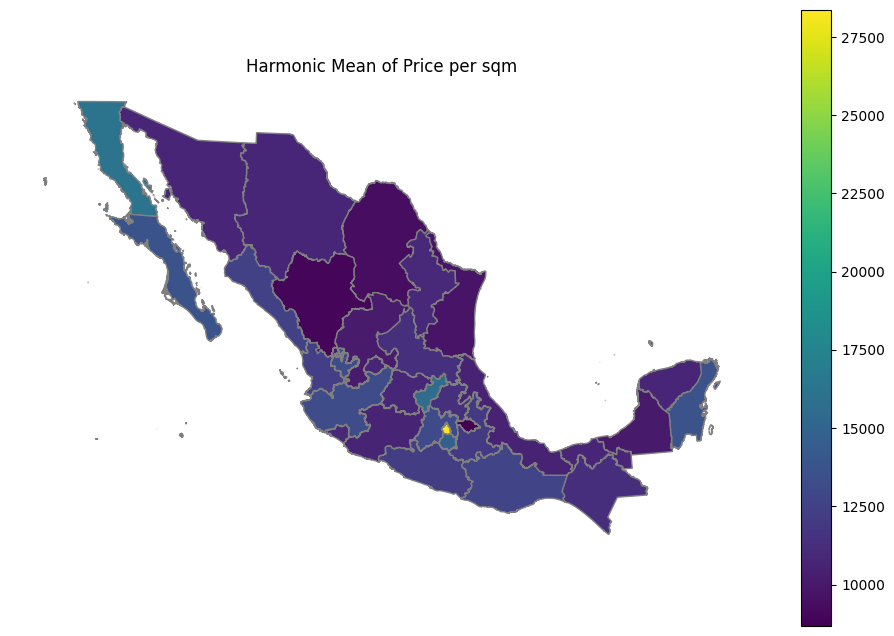

In [195]:
# get harmonic mean for each id_entidad_f and plot the map
table_harmonic_mean = (
    gdf_properties
    .groupby('id_entidad_f')
    # harmonic mean
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))
    .to_frame('harmonic_mean')
    .reset_index()
    .merge(
        gdf_mexico,
        left_on='id_entidad_f',
        right_on='cvegeo',
        how='right'
    )
    .pipe(gpd.GeoDataFrame, crs=gdf_mexico.crs, geometry='geometry')
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    table_harmonic_mean
    .plot('harmonic_mean', legend=True, ax=ax, cmap='viridis', edgecolor='gray')
)

# title
plt.title('Harmonic Mean of Price per sqm')

# dont show axis
plt.axis('off')

# show
plt.show()

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_4961/3290761503.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.mean(np.log(x['price_per_sqm'])))


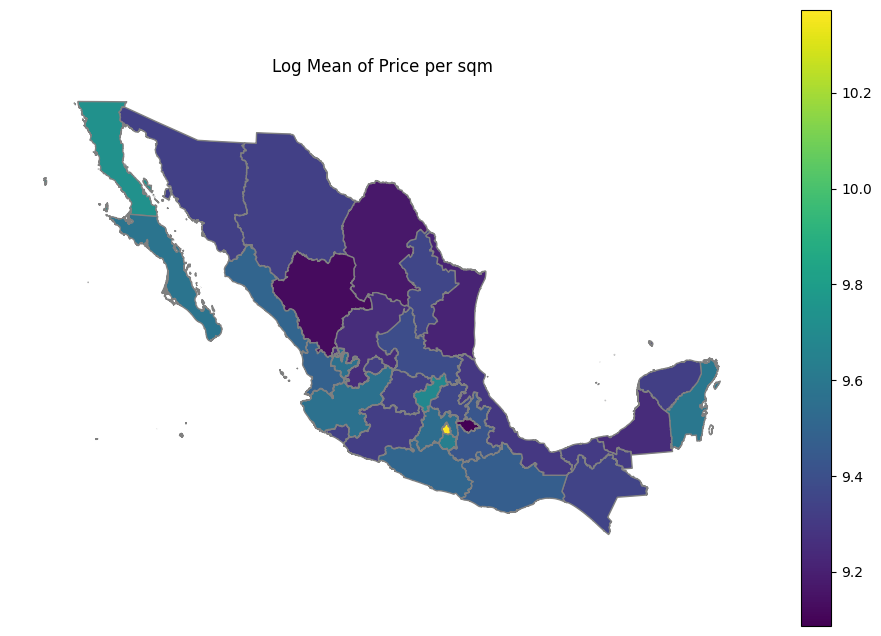

In [196]:
# get log mean for each id_entidad_f and plot the map
table_log_mean = (
    gdf_properties
    .groupby('id_entidad_f')
    # harmonic mean
    .apply(lambda x: np.mean(np.log(x['price_per_sqm'])))
    .to_frame('log_mean')
    .reset_index()
    .merge(
        gdf_mexico,
        left_on='id_entidad_f',
        right_on='cvegeo',
        how='right'
    )
    .pipe(gpd.GeoDataFrame, crs=gdf_mexico.crs, geometry='geometry')
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    table_log_mean
    .plot('log_mean', legend=True, ax=ax, cmap='viridis', edgecolor='gray')
)

# title
plt.title('Log Mean of Price per sqm')

# dont show axis
plt.axis('off')

# show
plt.show()

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_4961/2581535871.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))


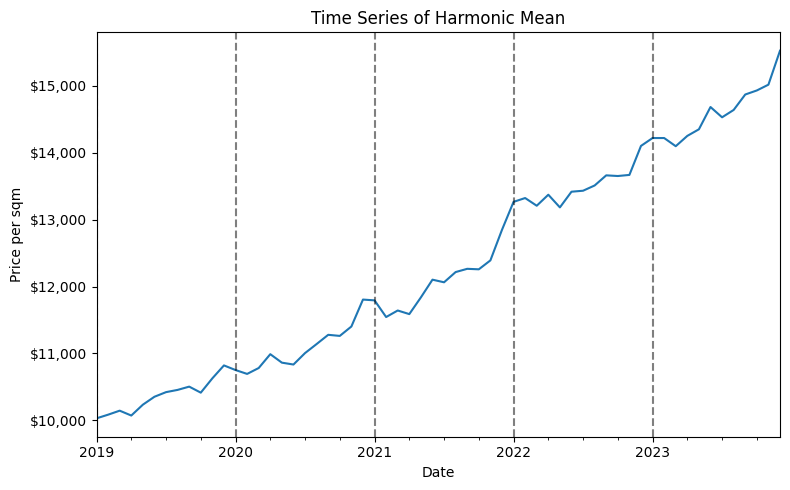

In [200]:
# hmean by month
ts_hmean = (
    gdf_properties
    .assign(
        month=lambda x: x['fecha_avaluo'].dt.to_period('M')
    )
    .groupby('month')
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))
    .to_frame('hmean')
)

# plot
ts_hmean.plot(figsize=(8, 5))

# add line each beginning of year
for year in range(gdf_properties['fecha_avaluo'].dt.year.min(), gdf_properties['fecha_avaluo'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Harmonic Mean")
# labels
plt.xlabel("Date")
plt.ylabel("Price per sqm")

# don't show legend
plt.legend().remove()

# y ticks in thousands and money
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# tight
plt.tight_layout()

---
# Univariate Analysis $X$

## Categorical

In [158]:
# for each categorical column, describe
cols_categorical = gdf_properties.select_dtypes(include='object').columns.tolist()

# describe
(gdf_properties[cols_categorical].describe().T.assign(perc=lambda x: x['freq'] / x['count']))

count  unique  \
property_id                    852913  852913   
colonia                        852913  111246   
id_clase_inmueble              852913       6   
id_tipo_inmueble               852913       3   
conservacion                   852913       5   
cve_ref_proximidad_urbana      852913       5   
cve_nivel_equipamiento_urbano  852913       4   
unidades_rentables             852913     751   
cve_clasificacion_zona         852913      18   
cve_vigilancia                 852913       5   
regimen_propiedad              852913       2   
tipo_vialidad                  852913      10   
id_municipio                   852913     124   
id_entidad_f                   852913      32   
cp                             852913    8174   
property_type                  852913       2   
city_cluster                   852913     158   
ocean_label                    852913       6   
hex_id                         852913   14129   
sexo_jefe                      852913       6   
educa_jefe                     852913     894   
tipo_viv                       852913       2   
tipo_adqui                     852913      16   
tipo_finan                     852913      14   
escrituras                     852913      15   

                                                            top    freq  \
property_id                    66cf10199ef943a5a5ff82129e53d5d7       1   
colonia                                                      SD   10248   
id_clase_inmueble                                             3  478697   
id_tipo_inmueble                                              2  415622   
conservacion                                                6.0  422467   
cve_ref_proximidad_urbana                                     2  378436   
cve_nivel_equipamiento_urbano                                 4  434325   
unidades_rentables                                            1  529951   
cve_clasificacion_zona                                        3  352274   
cve_vigilancia                                              1.0  378817   
regimen_propiedad                             PRIVADA COLECTIVA  437291   
tipo_vialidad                                               2.0  343842   
id_municipio                                                005   38340   
id_entidad_f                                                 19   97127   
cp                                                        32575    9395   
property_type                                             house  645566   
city_cluster                                                  0  118680   
ocean_label                                            no_ocean  669967   
hex_id                                          88498ed6cdfffff    1793   
sexo_jefe                                                   1.0  846125   
educa_jefe                                    6.055414861569973   10110   
tipo_viv                                                    1.0  830662   
tipo_adqui                                                  1.0  648435   
tipo_finan                                                  5.0  521751   
escrituras                                                  1.0  822853   

                                   perc  
property_id                    0.000001  
colonia                        0.012015  
id_clase_inmueble               0.56125  
id_tipo_inmueble               0.487297  
conservacion                   0.495323  
cve_ref_proximidad_urbana      0.443698  
cve_nivel_equipamiento_urbano  0.509225  
unidades_rentables             0.621342  
cve_clasificacion_zona         0.413025  
cve_vigilancia                 0.444145  
regimen_propiedad              0.512703  
tipo_vialidad                  0.403138  
id_municipio                   0.044952  
id_entidad_f                   0.113877  
cp                             0.011015  
property_type                  0.756895  
city_cluster                   0.139147  
ocean_label                    0.785505  
hex_id  

In [82]:
# count of unique values 
def count_unique_values(df, col, max_values=10):
    """
    Count the number of unique values in a column and return the result as a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to analyze.
        max_values (int): The maximum number of unique values to display. If there are more unique values, they will be grouped in an 'Others' category.
    
    Returns:
        pd.DataFrame: A DataFrame with the count of unique values.
    """
    # counts
    table_counts = (
        df[col]
        .value_counts(dropna=False)
        .reset_index()
        .assign(
            perc=lambda x: x['count'] / x['count'].sum()
        )
        .sort_values(by='count', ascending=False)
        .head(max_values)
    )
    
    num_others = df.shape[0] - table_counts['count'].sum()

    # append others if necessary
    if num_others > 0:
        table_counts = pd.concat([
            table_counts,
            pd.DataFrame({
                col: 'others',
                'count': [num_others],
                'perc': [num_others / df.shape[0]]
            })
        ],
        axis=0,
        ignore_index=True
    )

    return table_counts


# count of unique values
columns_categorical = gdf_properties.select_dtypes(include='object').columns.tolist()

# count of unique values
for col in columns_categorical:
    print(f"\n{col} {'=' * 50}")
    print(count_unique_values(gdf_properties, col, max_values=10))


property_id ==================================================
                         property_id   count      perc
0   66cf10199ef943a5a5ff82129e53d5d7       1  0.000001
1   abccb346a9b343e2b370a072eea0011d       1  0.000001
2   374ae4df73d547d9874a09f1a24a1161       1  0.000001
3   ad5e60f85df542ea8dde9e6244b8f93a       1  0.000001
4   6bfda7aa208b4f61a13acf7af1a3198e       1  0.000001
5   7ddd5a94feed4955a809f986d95722d8       1  0.000001
6   d2e75fb3b385461995bf8d34b9d1fdfb       1  0.000001
7   6f1194f9853443219e63f4a3222b010e       1  0.000001
8   b42114511f3f46f6b7efb88db19897cc       1  0.000001
9   4cc1a8daf11e434ab6d0b086b48a801b       1  0.000001
10                            others  852903  0.999988

colonia ==================================================
                          colonia   count      perc
0                              SD   10248  0.012015
1            BRISAS DEL CAMPESTRE    2678  0.003140
2             LOS HEROES TIZAYUCA    2229  0.002613
3       

In [84]:
print(columns_categorical)

['property_id', 'colonia', 'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano', 'unidades_rentables', 'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad', 'tipo_vialidad', 'id_municipio', 'id_entidad_f', 'cp', 'property_type', 'city_cluster', 'ocean_label', 'hex_id', 'clase_hog', 'sexo_jefe', 'tipo_viv', 'tenencia', 'tipo_adqui', 'tipo_finan', 'escrituras']


In [85]:
# get entropy of each column
def entropy(series):
    """
    Calculate the entropy of a pandas Series.

    Parameters:
        series (pd.Series): The input Series.

    Returns:
        float: The entropy of the Series.
    """
    # counts
    counts = series.value_counts(normalize=True)
    return -np.sum(counts * np.log2(counts + 1e-6))

# entropy of each column
(
    gdf_properties
    .select_dtypes(include='object')
    .apply(entropy)
    .sort_values(ascending=False)
)

property_id                      18.812244
colonia                          13.944723
hex_id                           12.711194
cp                               10.817386
id_municipio                      5.863863
city_cluster                      5.446512
id_entidad_f                      4.508191
unidades_rentables                2.576004
cve_clasificacion_zona            1.995997
tipo_vialidad                     1.832806
cve_ref_proximidad_urbana         1.598362
cve_vigilancia                    1.535034
id_tipo_inmueble                  1.511245
cve_nivel_equipamiento_urbano     1.496655
id_clase_inmueble                 1.383038
conservacion                      1.344483
ocean_label                       1.178771
tipo_adqui                        1.009765
regimen_propiedad                 0.999531
tipo_finan                        0.996337
property_type                     0.800162
tenencia                          0.519583
escrituras                        0.222386
tipo_viv   

## Continuous Variables

In [161]:
# describe of numerical columns
cont_cols = gdf_properties.select_dtypes(include='number').columns.tolist()

# describe
gdf_properties[cont_cols].describe()

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


valor_fisico_construccion       elevador        niveles  valor_mercado  \
count               8.529130e+05  824546.000000  852913.000000   8.529130e+05   
mean                6.771550e+05       1.565899       1.581915   1.394750e+06   
std                 7.911567e+05       0.809980       1.148765   2.013468e+06   
min                 3.231000e+01       0.000000       0.000000   1.998550e+05   
25%                 2.911860e+05       2.000000       1.000000   5.231000e+05   
50%                 4.212228e+05       2.000000       1.000000   7.793210e+05   
75%                 7.960400e+05       2.000000       2.000000   1.534000e+06   
max                 6.041251e+07       2.000000      65.000000   8.676513e+07   

       valor_concluido_total          nivel     edad_anios  \
count           8.529130e+05  852913.000000  852913.000000   
mean            1.394683e+06       3.478753       5.874641   
std             2.012926e+06       1.809370       9.150407   
min             2.000000e+05       0.000000       0.000000   
25%             5.230000e+05       3.000000       0.000000   
50%             7.790000e+05       3.000000       0.000000   
75%             1.534000e+06       3.000000      10.000000   
max             8.676500e+07      33.000000     100.000000   

       vida_util_remanente      recamaras          banos    medio_banos  \
count        852913.000000  852913.000000  852913.000000  852913.000000   
mean             58.785733       2.337574       1.454888       0.328912   
std              11.039631       0.685365       0.777839       0.502492   
min               0.000000       1.000000       1.000000       0.000000   
25%              53.000000       2.000000       1.000000       0.000000   
50%              60.000000       2.000000       1.000000       0.000000   
75%              69.000000       3.000000       2.000000       1.000000   
max              80.000000      47.000000      12.000000      11.000000   

       estacionamiento  superficie_terreno  superficie_construida  \
count    852913.000000       852913.000000          852913.000000   
mean          1.115598          106.557037              82.676169   
std           0.654863          104.310268              58.184491   
min           0.000000            1.000000              24.000000   
25%           1.000000           61.000000              48.000000   
50%           1.000000           90.000000              63.000000   
75%           1.000000          120.000000              97.000000   
max          23.000000         9944.000000            1494.000000   

       superficie_accesoria  superficie_vendible  valor_fisico_terreno_m2  \
count         852913.000000        852913.000000             8.529130e+05   
mean               5.099102            87.563570             4.826449e+03   
std               22.743974            66.586611             9.671152e+03   
min                0.000000            31.000000             2.831000e+01   
25%                0.000000            49.000000             1.740000e+03   
50%                0.000000            64.000000             2.547024e+03   
75%                1.000000           101.000000             4.200000e+03   
max             5255.000000          1494.000000             1.607634e+06   

       distance_to_ocean       longitud        latitud  \
count           852913.0  852913.000000  852913.000000   
mean                 inf    -100.676807      22.565154   
std                  NaN       5.039659       3.611178   
min                500.0    -117.074973      14.846178   
25%                  NaN    -103.348286      19.686514   
50%                  NaN    -100.376147      20.989348   
75%                  NaN     -99.056323      25.649069   
max                  inf     -86.798439      32.635431   

       count_supermarkets_at_1km  count_hospitals_at_5km  count_metro_at_1km  \
count              852913.000000           852913.000000       852913.000000   
mean                    0.975924           

In [163]:
# columns with 'count' in the name
gdf_properties.filter(like='count').gt(0).mean()

count_supermarkets_at_1km    0.513222
count_hospitals_at_5km       0.537633
count_metro_at_1km           0.040273
count_schools_at_1km         0.051698
count_restaurants_at_1km     0.202811
dtype: float64

In [165]:
# count of elevador
gdf_properties['elevador'].gt(0).mean()

0.7683608996462711

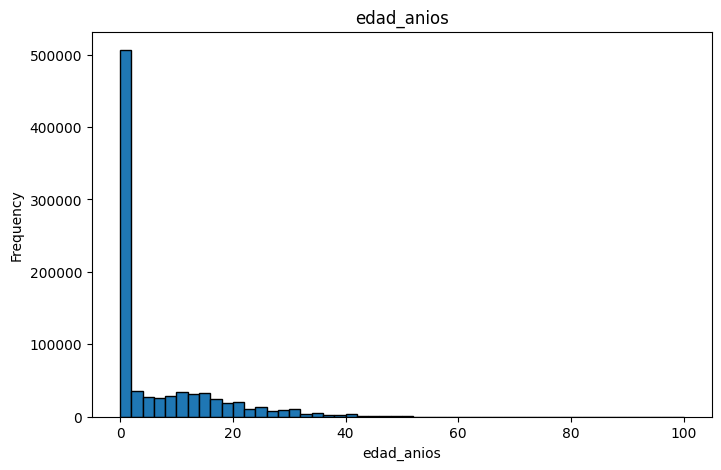

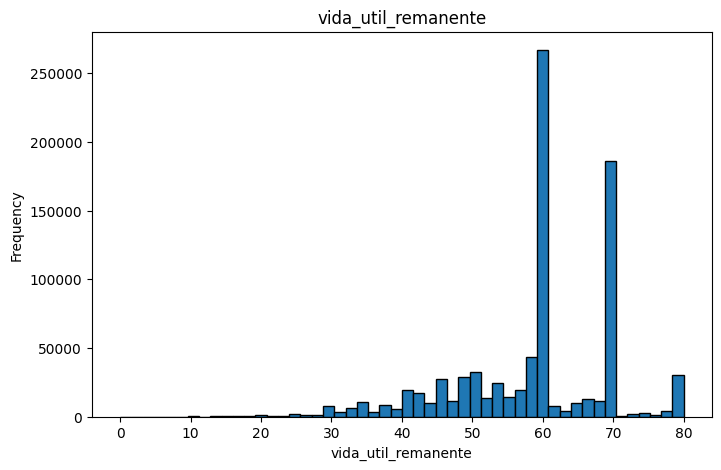

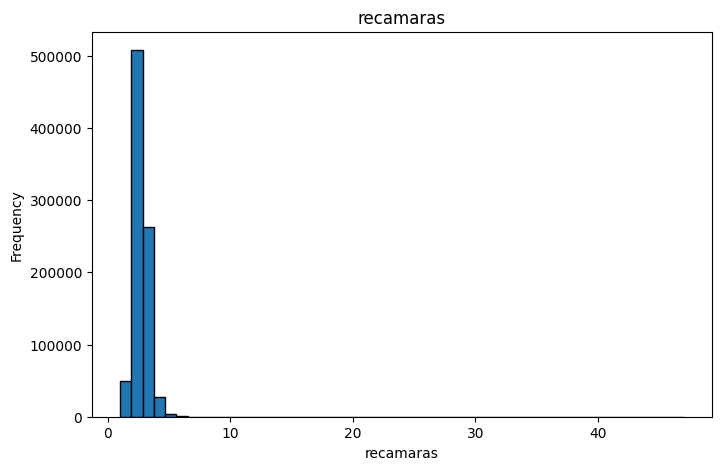

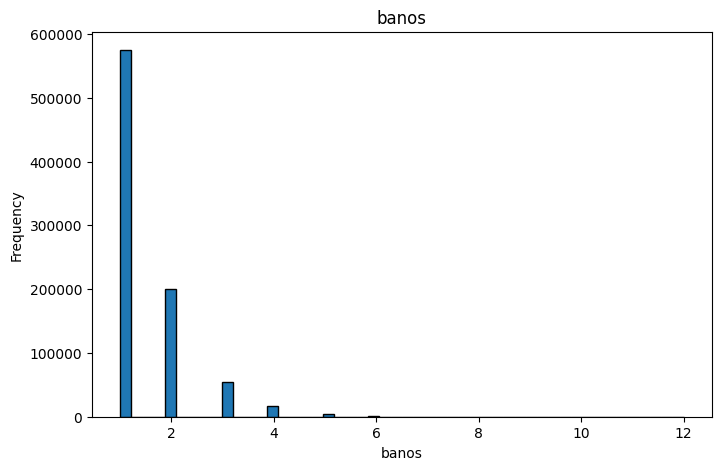

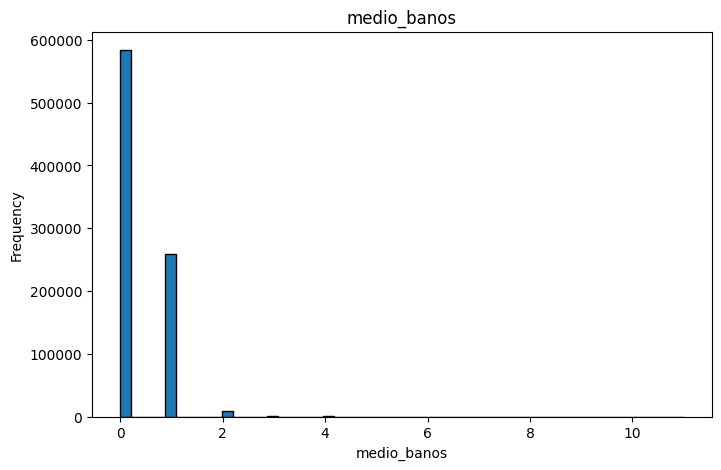

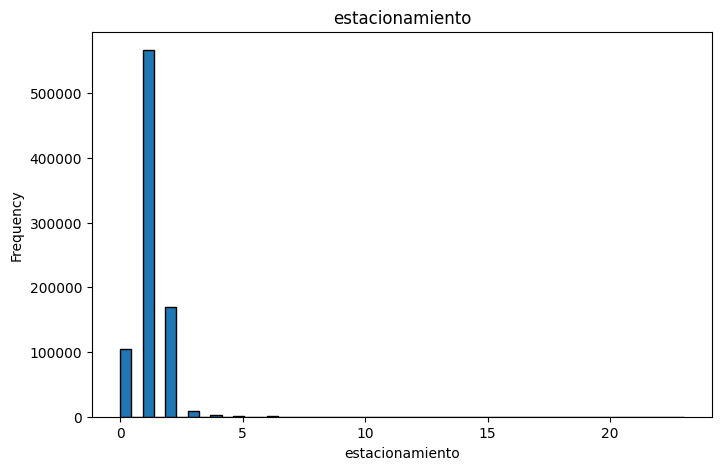

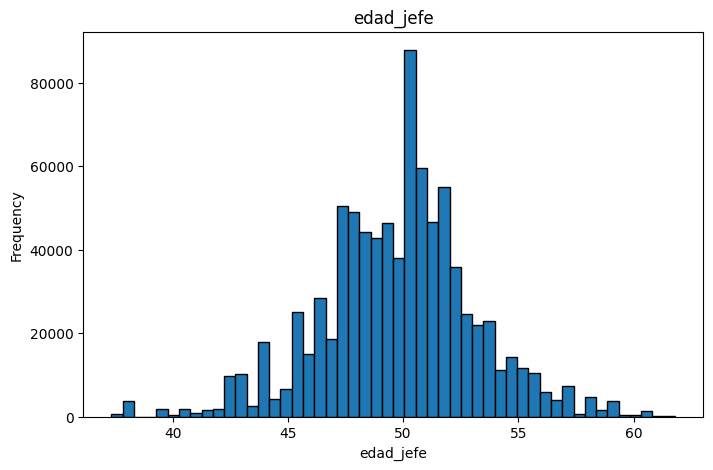

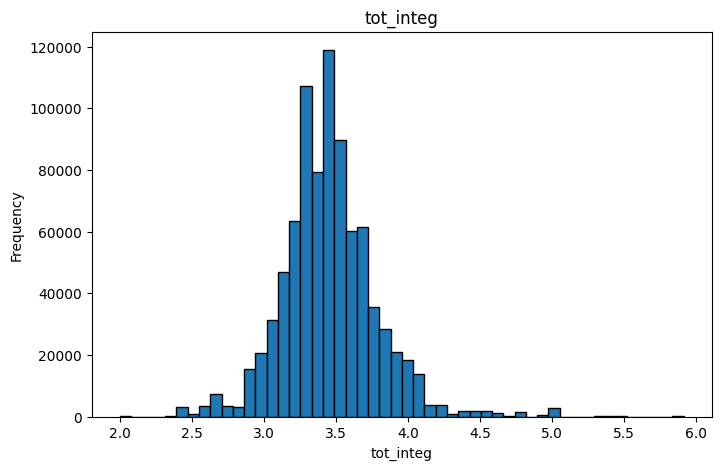

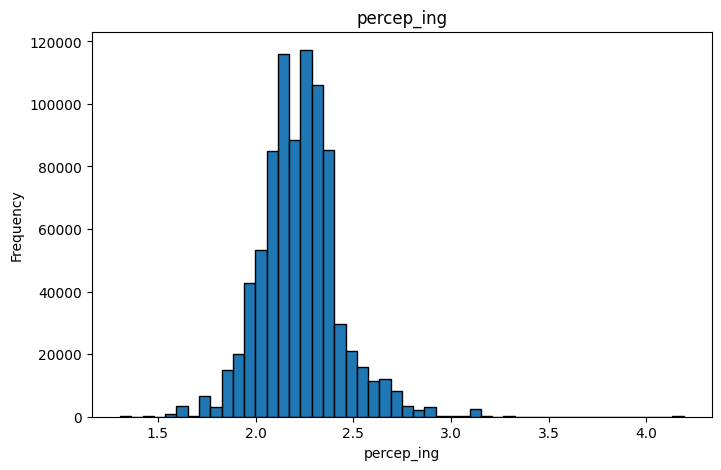

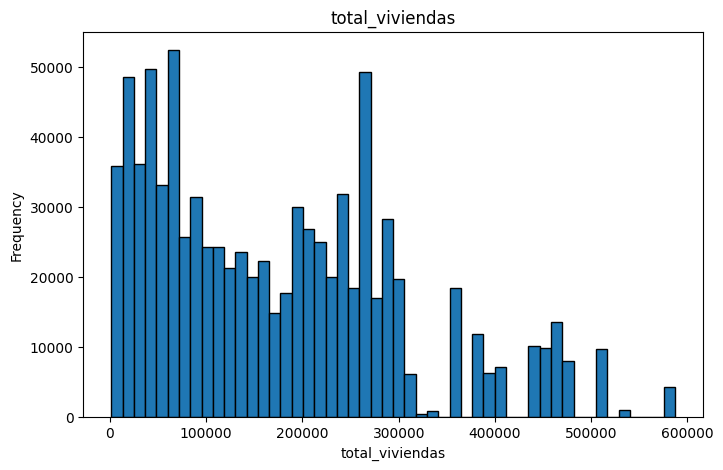

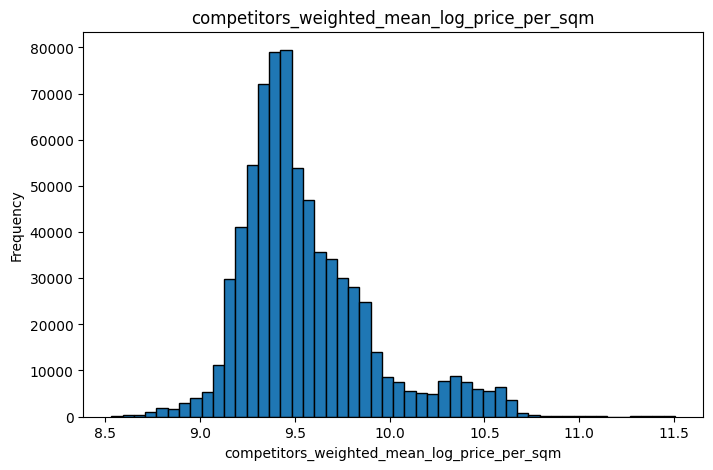

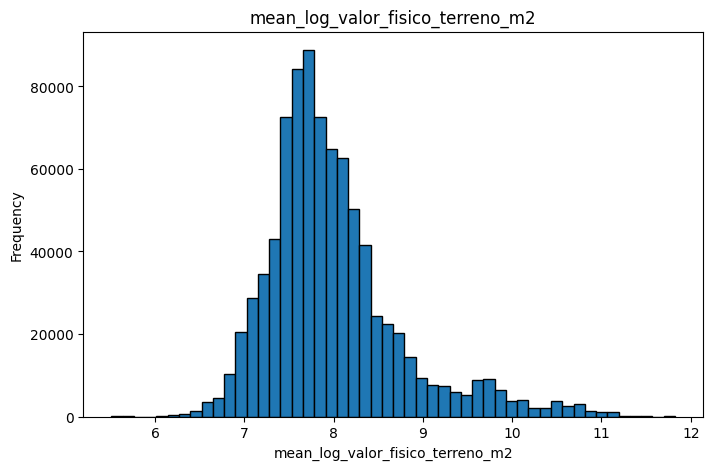

In [180]:
# histogram
def create_histogram(df, col, bins=10, log=False):
    """
    Create a histogram of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.
        bins (int): The number of bins to use in the histogram.

    Returns:
        None: The function does not return a value. It displays the histogram.
    """
    # plot
    df[col].plot(kind='hist', bins=bins, edgecolor='black', figsize=(8, 5))

    # title
    plt.title(f'{col}')

    # labels
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # if log, then log base 10
    if log:
        plt.xscale('log')

    # show
    plt.show()

# histogram of log values


# histogram of 'edad_anios'
cols_to_plot = [
    'edad_anios',
    'vida_util_remanente',
    'recamaras',
    'banos',
    'medio_banos',
    'estacionamiento',
    'edad_jefe',
    'tot_integ',
    'percep_ing',
    'total_viviendas',
    'competitors_weighted_mean_log_price_per_sqm',
    'mean_log_valor_fisico_terreno_m2'
]

# normal
for col in cols_to_plot:
    create_histogram(gdf_properties, col, bins=50)

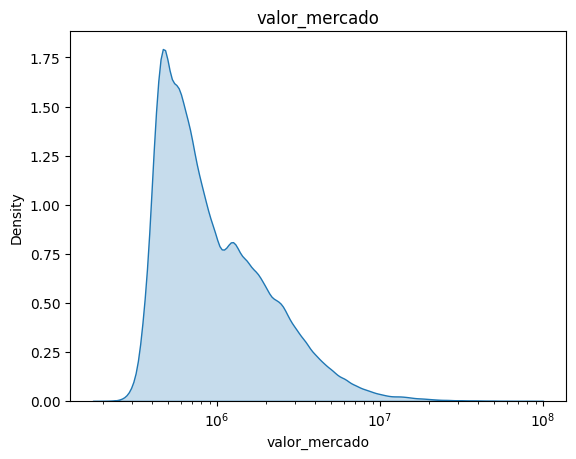

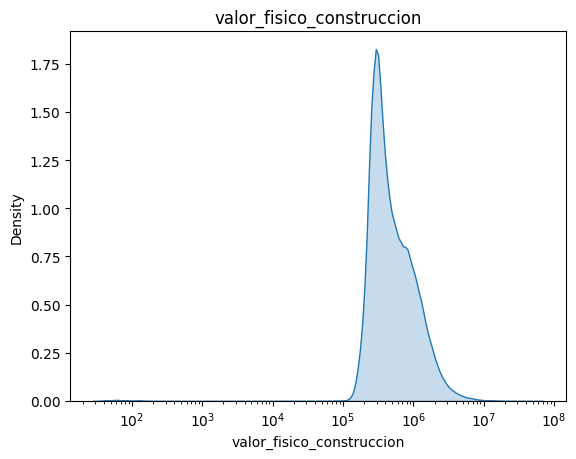

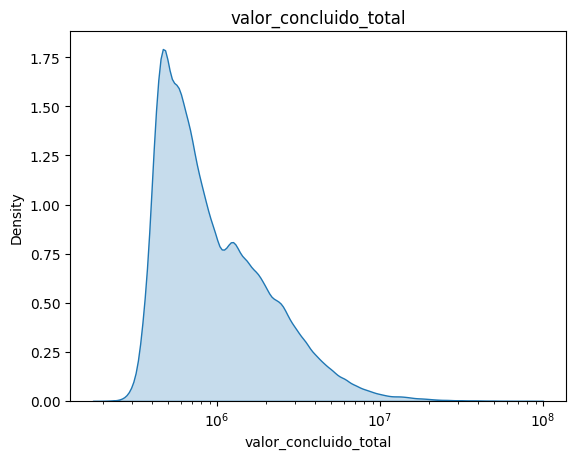

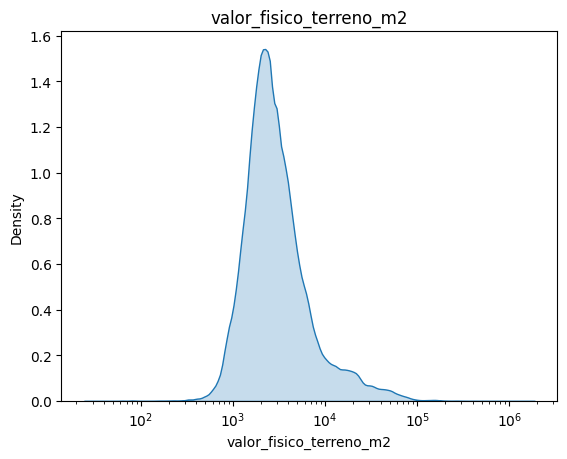

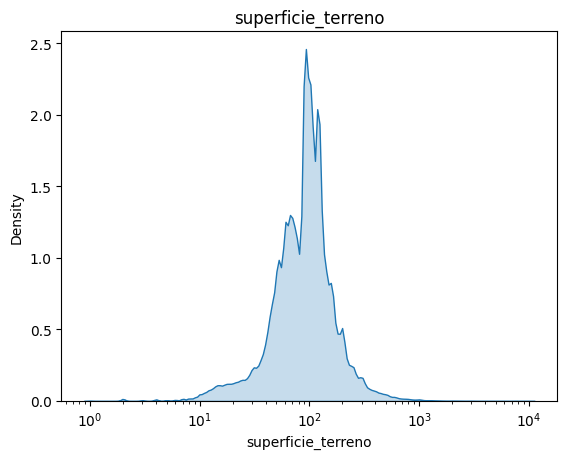

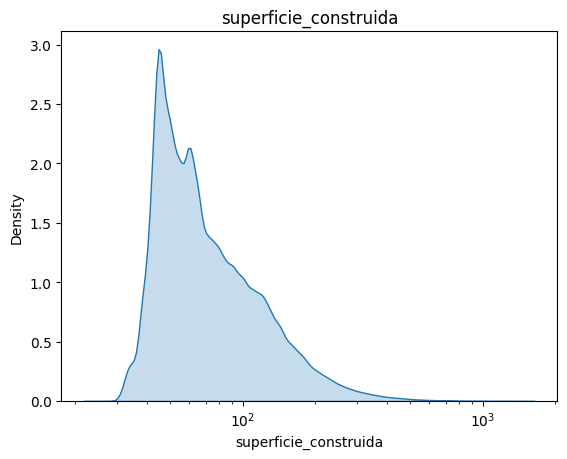

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_4961/2804854938.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


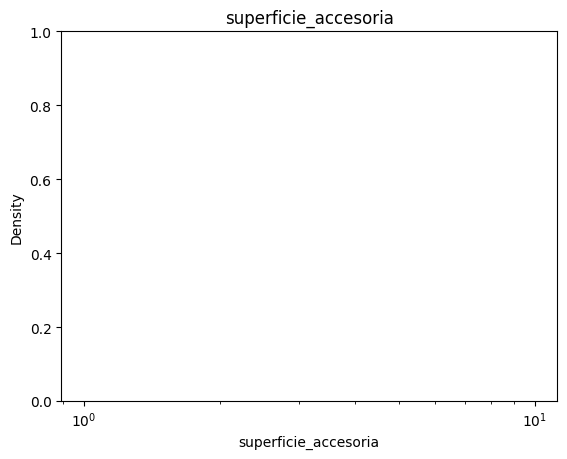

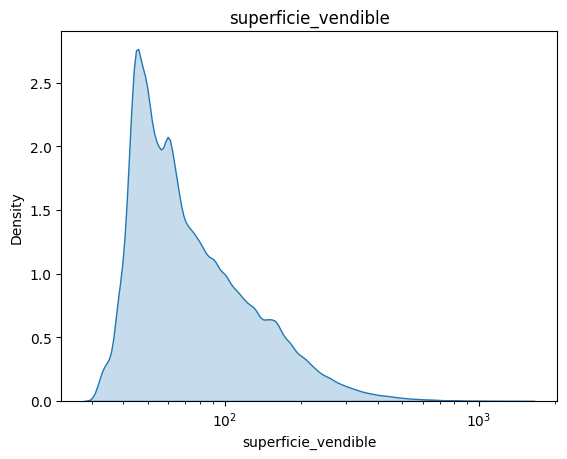

In [185]:
# create kde
def create_kde(df, col, log=False):
    """
    Create a kernel density estimate plot of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.

    Returns:
        None: The function does not return a value. It displays the KDE plot.
    """
    # plot
    sns.kdeplot(
        df,
        x=col,
        color='C0',
        legend=False,
        fill=True,
        log_scale=True
    )

    # title
    plt.title(f'{col}')

    # labels
    plt.xlabel(col)
    plt.ylabel('Density')

    # show
    plt.show()

# log
cols_to_plot_log = [
    'valor_mercado',
    'valor_fisico_construccion',
    'valor_concluido_total',
    'valor_fisico_terreno_m2',
    'superficie_terreno',
    'superficie_construida',
    'superficie_accesoria',
    'superficie_vendible'
]

# plt
for col in cols_to_plot_log:
    create_kde(gdf_properties, col, log=True)

---
# Colinearity $X^TX$

In [79]:
def plt_clustermap(df, cols, method_corr, cmap='coolwarm_r', fmat='.4f'):
    """
    Create a clustermap of the correlation matrix of a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        cols (list): The columns to include in the correlation matrix.
        method (str): The method to use for clustering.
        cmap (str): The colormap to use in the clustermap.

    Returns:
        None: The function does not return a value. It displays the clustermap.
    """
    # corr
    corr_matrix = df[cols].corr(method=method_corr)

    # cluster map
    plt.figure(figsize=(8, 8))
    sns.clustermap(corr_matrix, cmap=cmap, annot=True, center=0, fmt=fmat)
    plt.show()


<Figure size 800x800 with 0 Axes>

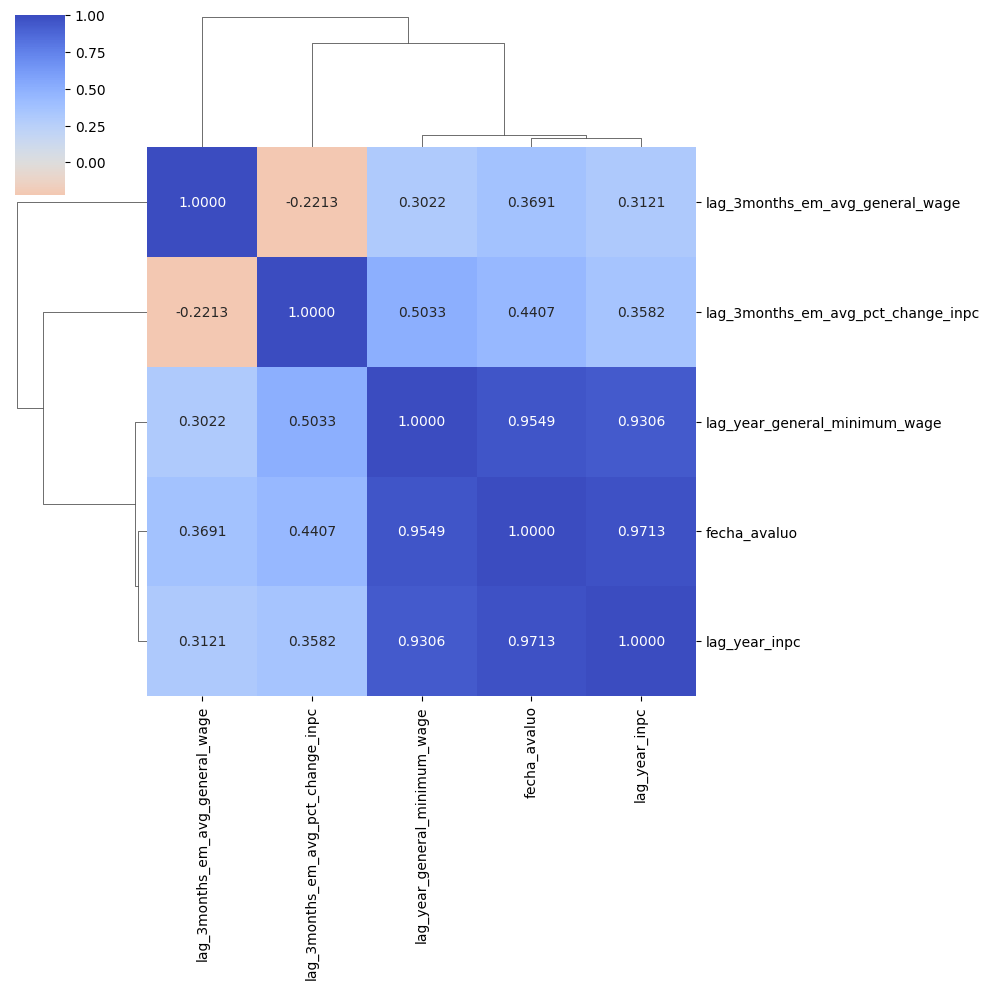

In [80]:
# time variables
cols_to_get_corr = [
    'fecha_avaluo', 'lag_year_inpc', 'lag_3months_em_avg_pct_change_inpc', 'lag_year_general_minimum_wage', 'lag_3months_em_avg_general_wage'
]

# corr
plt_clustermap(gdf_properties, cols_to_get_corr, 'pearson')

<Figure size 800x800 with 0 Axes>

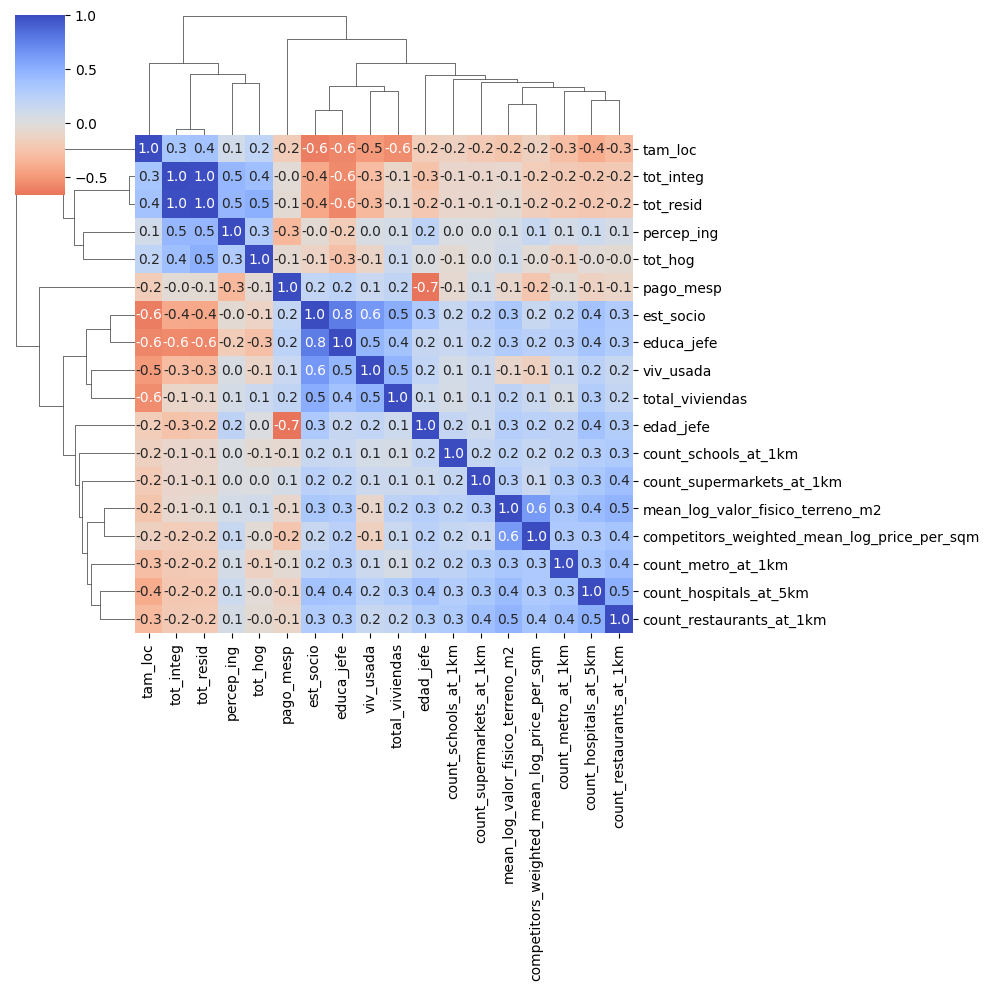

In [86]:
# zone variables
cols_to_get_corr = [
    'tam_loc', 'est_socio', 'edad_jefe', 'educa_jefe', 'tot_integ',
    'percep_ing', 'pago_mesp', 'viv_usada', 'tot_resid', 'tot_hog', 
    'total_viviendas',
    'count_supermarkets_at_1km',
    'count_hospitals_at_5km',
    'count_metro_at_1km',
    'count_schools_at_1km',
    'count_restaurants_at_1km',
    'mean_log_valor_fisico_terreno_m2',
    'competitors_weighted_mean_log_price_per_sqm'
]

# corr
plt_clustermap(gdf_properties_time_control, cols_to_get_corr, 'spearman', fmat='.1f')

<Figure size 800x800 with 0 Axes>

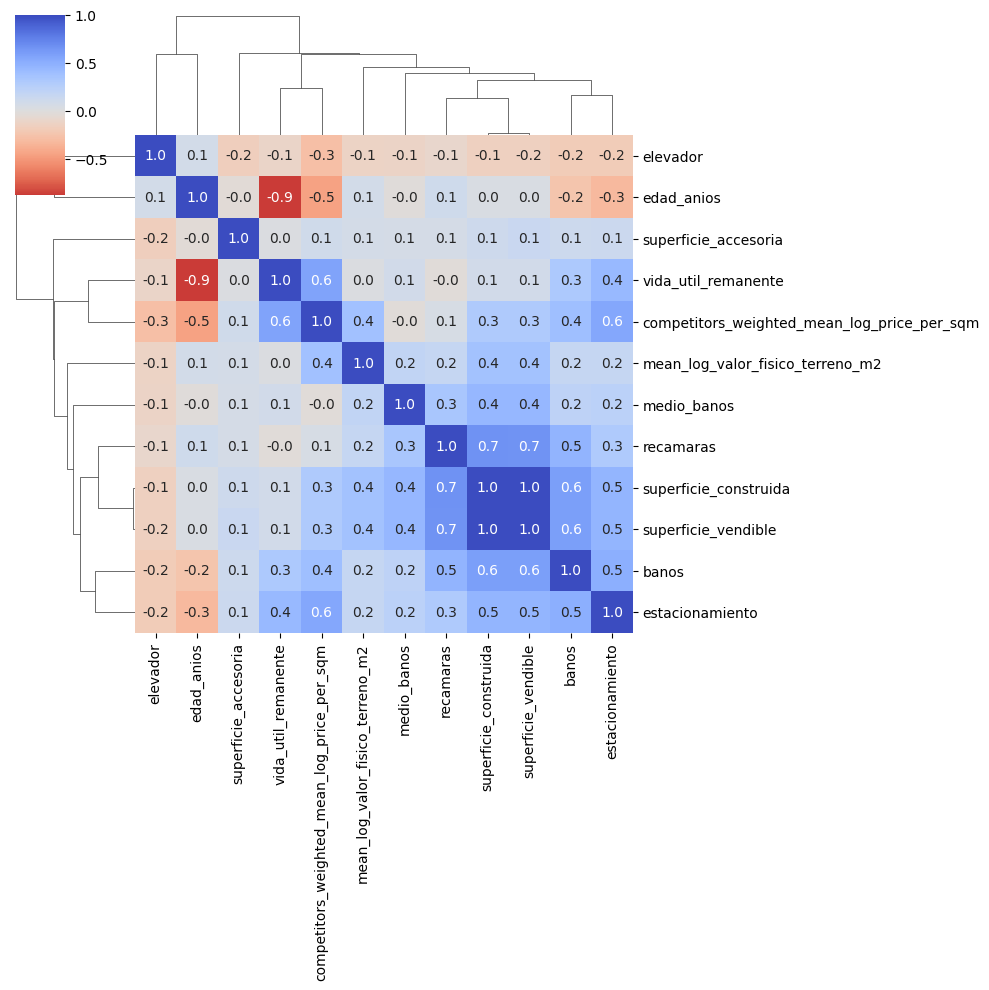

In [88]:
# controlled variables
cols_to_get_corr = [
    'elevador', 'edad_anios', 'vida_util_remanente', 'recamaras',
    'banos', 'medio_banos', 'estacionamiento',
    'superficie_construida', 'superficie_accesoria', 'superficie_vendible',
    'mean_log_valor_fisico_terreno_m2',
    'competitors_weighted_mean_log_price_per_sqm'
]

# corr
plt_clustermap(gdf_properties_spatiotemporal_control, cols_to_get_corr, 'spearman', fmat='.1f')

---
# Relationship between $X$ and $Y$

## Subset

In [16]:
# count of year
table_spatiotemporal_counts = (
    gdf_properties
    .assign(year_appraisal=gdf_properties['fecha_avaluo'].dt.year)
    .groupby(['year_appraisal'], as_index=False)
    .size()
    .sort_values('size', ascending=False)
    .head()
)
table_spatiotemporal_counts

year_appraisal    size
2            2021  205617
0            2019  197406
1            2020  168745
3            2022  159755
4            2023  121390

In [17]:
# count of city cluster and year of fecha avaluo
table_spatiotemporal_counts = (
    gdf_properties
    .assign(year_appraisal=gdf_properties['fecha_avaluo'].dt.year)
    .query("id_entidad_f.eq('09')")
    .groupby(['id_entidad_f', 'id_municipio', 'year_appraisal'], as_index=False)
    .size()
    .sort_values('size', ascending=False)
    .head()
)
table_spatiotemporal_counts

id_entidad_f id_municipio  year_appraisal  size
57           09          014            2021  2450
55           09          014            2019  2003
58           09          014            2022  1850
56           09          014            2020  1638
27           09          007            2021  1602

In [18]:
# count of city cluster
table_spatiotemporal_counts = (
    gdf_properties
    .query("id_entidad_f.eq('09')")
    .groupby(['id_entidad_f', 'id_municipio'])
    .size()
    .sort_values(ascending=False)
    .to_frame('count')
    .reset_index()
)
table_spatiotemporal_counts

id_entidad_f id_municipio  count
0            09          014   9049
1            09          015   6119
2            09          007   4856
3            09          016   4376
4            09          010   4314
5            09          005   4068
6            09          003   3966
7            09          002   3596
8            09          006   3307
9            09          012   2828
10           09          017   2523
11           09          004   1743
12           09          011    938
13           09          008    621
14           09          013    610

In [19]:
# subsets
gdf_properties_time_control = gdf_properties.query("fecha_avaluo.dt.year.eq(2021)")
gdf_properties_spatial_control = gdf_properties.query("id_entidad_f.eq('09') & id_municipio.eq('014')")
gdf_properties_spatiotemporal_control = gdf_properties.query("id_entidad_f.eq('09') & id_municipio.eq('014') & fecha_avaluo.dt.year.eq(2021)")

# see shapes
print(f"Original shape: {gdf_properties.shape}")
print(f"Subset shape time: {gdf_properties_time_control.shape}")
print(f"Subset shape space: {gdf_properties_spatial_control.shape}")
print(f"Subset shape space-time: {gdf_properties_spatiotemporal_control.shape}")

Original shape: (852913, 93)
Subset shape time: (205617, 93)
Subset shape space: (9049, 93)
Subset shape space-time: (2450, 93)


## Categorical

In [19]:
# box plot of categorical
def plot_box_plot(df, col, max_values=10):
    """
    Create a box plot of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.
        max_values (int): The maximum number of unique values to display. If there are more unique values, they will be grouped in an 'Others' category.

    Returns:
        None: The function does not return a value. It displays the box plot.
    """
    # generate aux col value
    df = (
        df.copy()
        .assign(
            col_count=lambda x: x.groupby(col)[col].transform('count'),
            rank_col=lambda x: x['col_count'].rank(ascending=False, method='dense'),
            col_category=lambda x: np.where(x['rank_col'] < max_values, x[col], 'others')
        )
        .assign(
            col_category=lambda x: pd.Categorical(x['col_category'], ordered=True)
        )
    )

    # box plot
    sns.boxplot(
        x='col_category',
        y='price_per_sqm',
        data=df,
        showfliers=False
    )

    # x label
    plt.xlabel(col)
    plt.xticks(rotation=90)

    # y label
    plt.ylabel('Price per sqm')

    # y log scale
    plt.yscale('log')

    # title
    plt.title(f'Price per sqm by {col}')

    # show
    plt.show()


/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


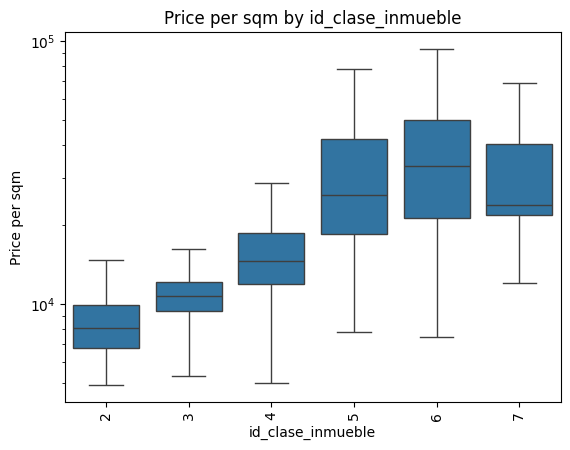

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


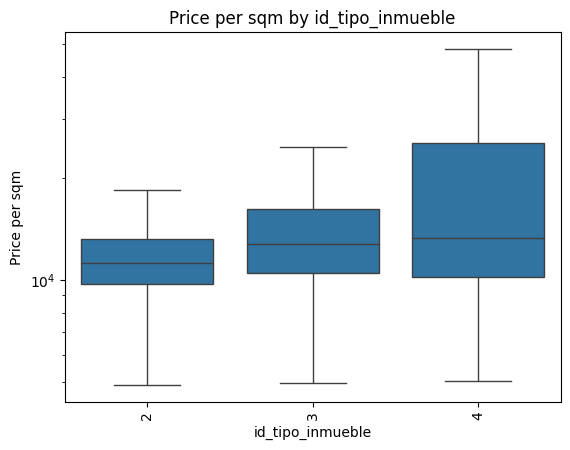

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


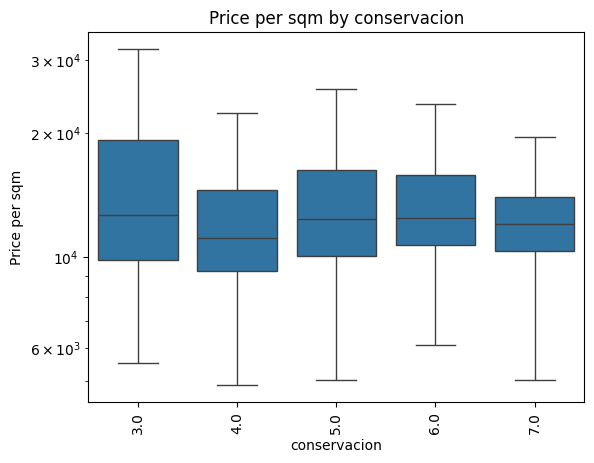

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


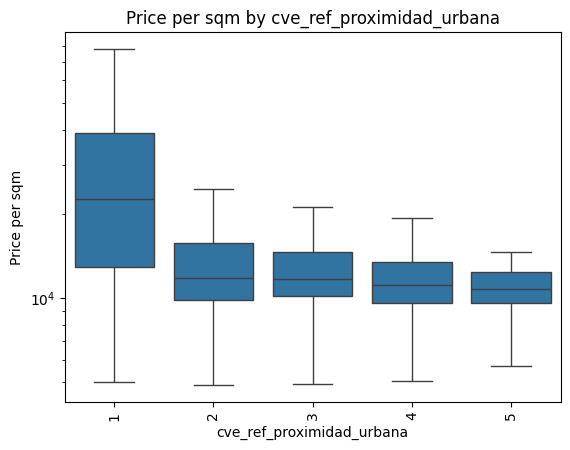

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


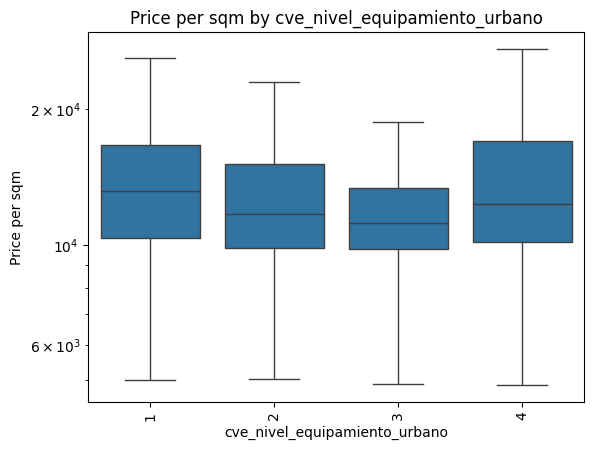

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


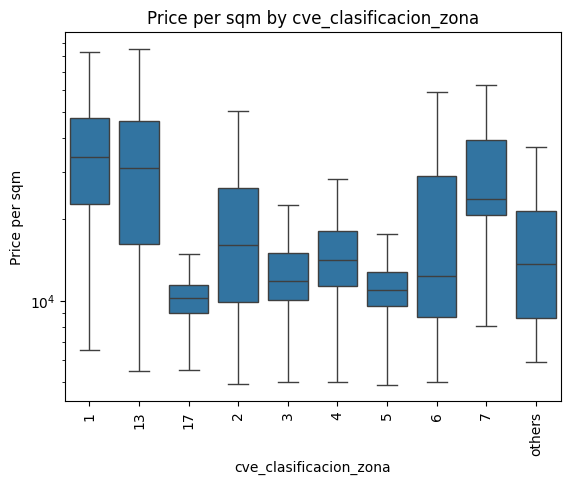

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


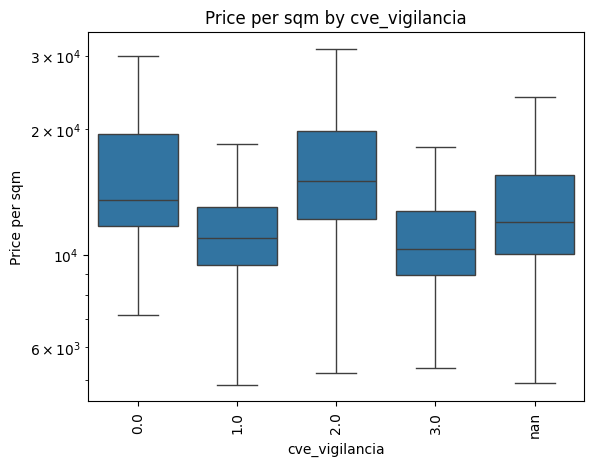

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


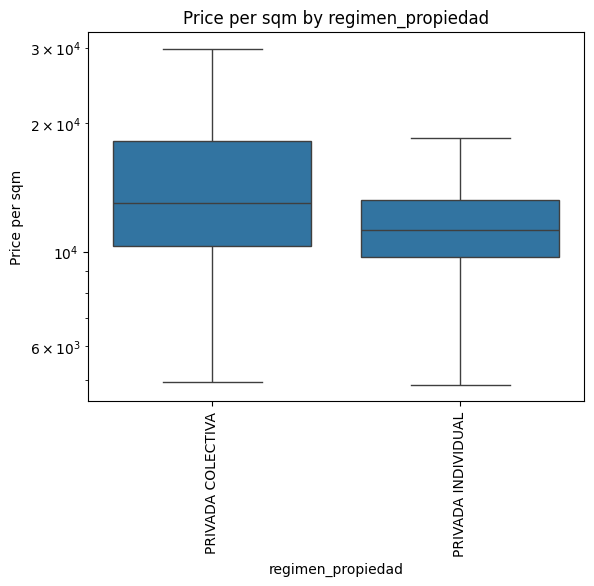

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


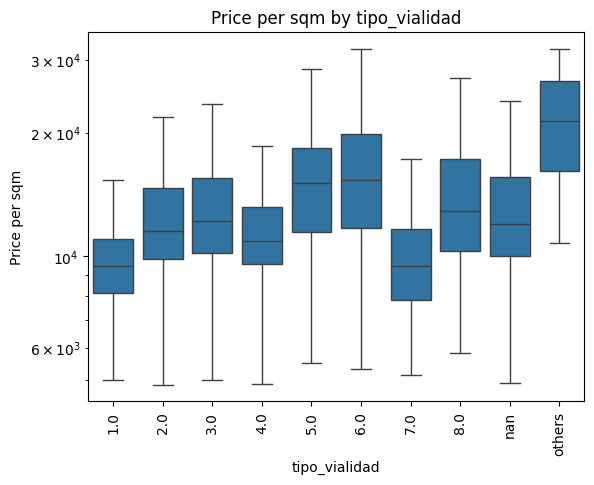

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


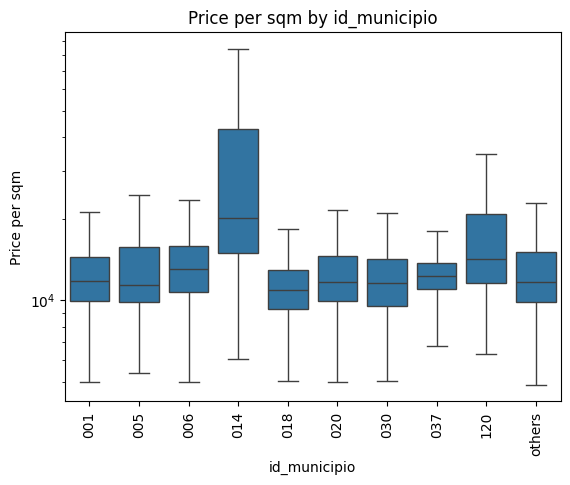

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


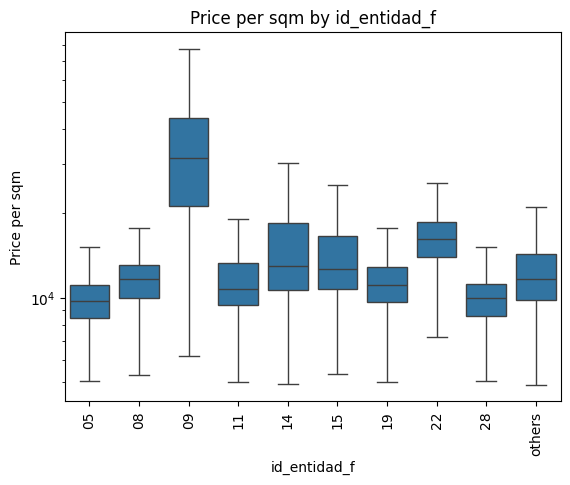

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


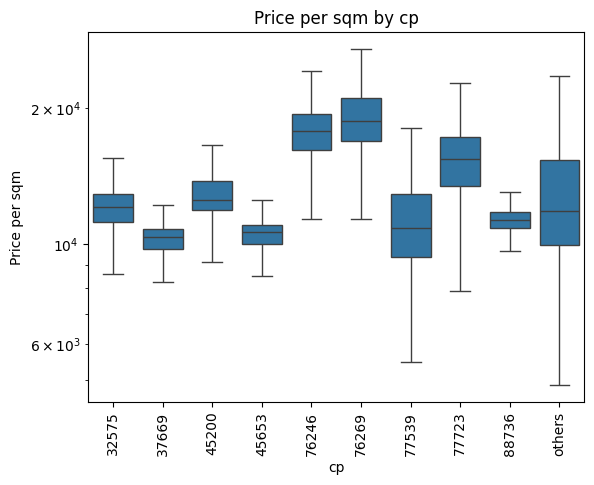

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


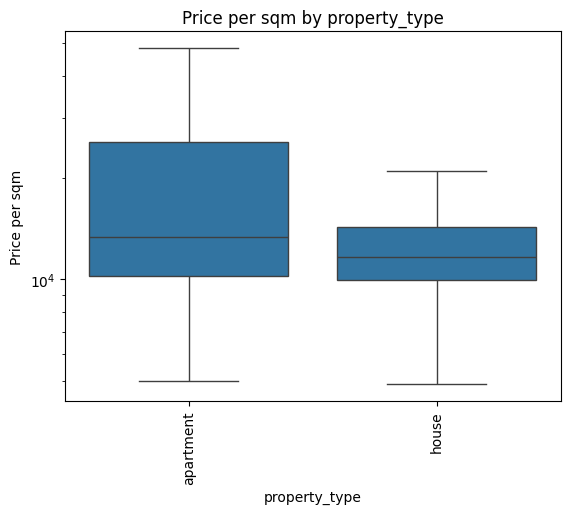

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


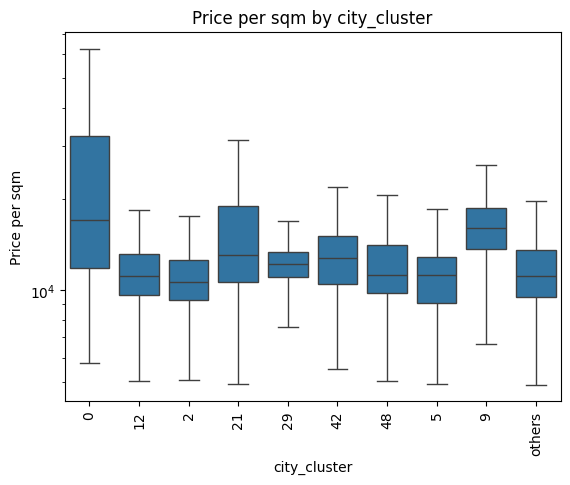

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


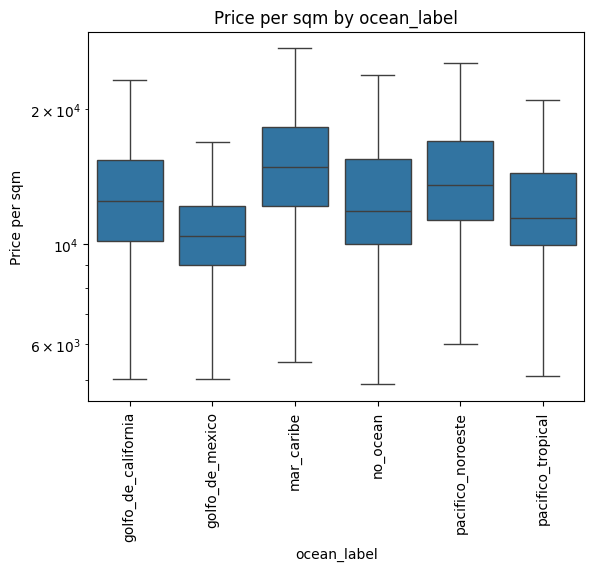

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


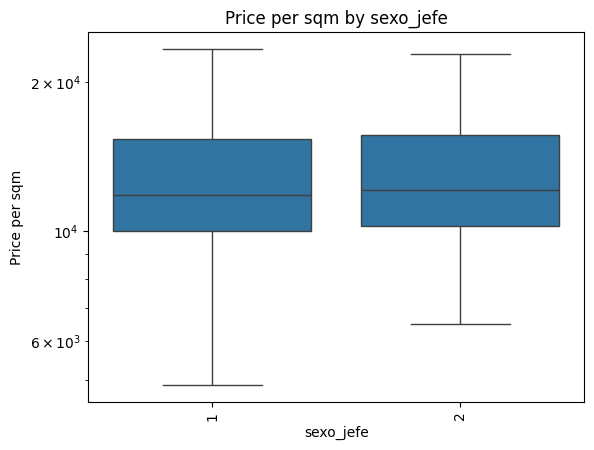

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


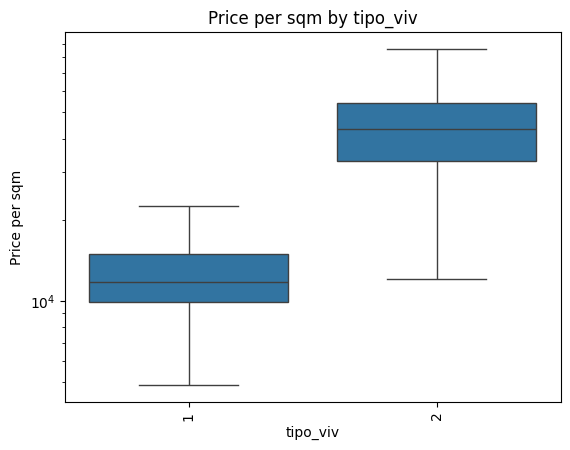

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


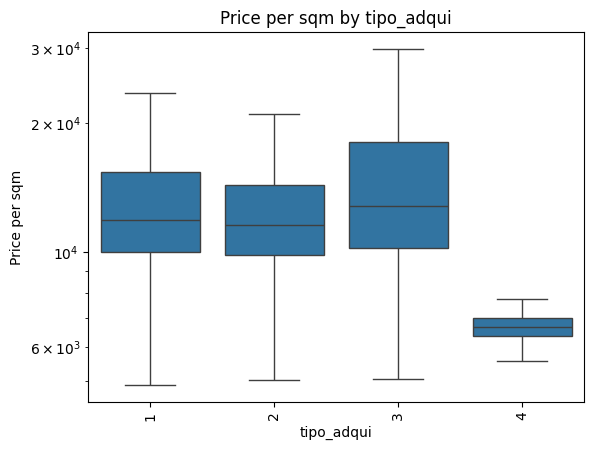

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


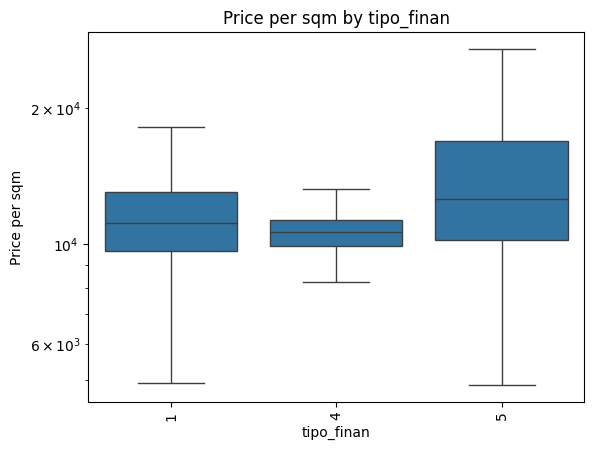

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


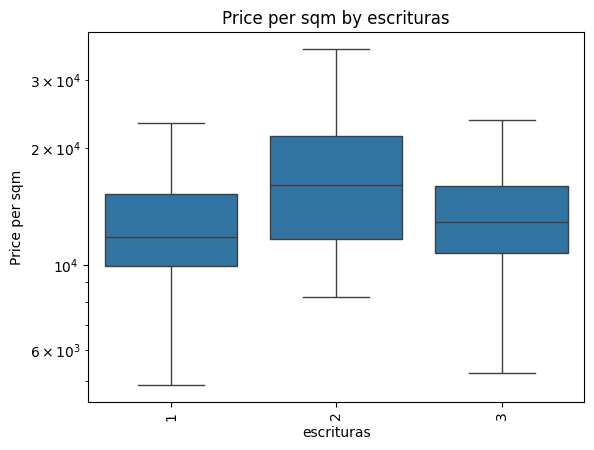

In [72]:
# plot by time
columns_categorical = [
    'id_clase_inmueble', 'id_tipo_inmueble',
    'conservacion', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
    'cve_clasificacion_zona', 'cve_vigilancia',
    'regimen_propiedad', 'tipo_vialidad', 'id_municipio', 'id_entidad_f',
    'cp', 'property_type', 'city_cluster', 'ocean_label', 'sexo_jefe',
    'tipo_viv', 'tipo_adqui', 'tipo_finan', 'escrituras'
]

for col in columns_categorical:
    plot_box_plot(gdf_properties_time_control, col, max_values=10)
    

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


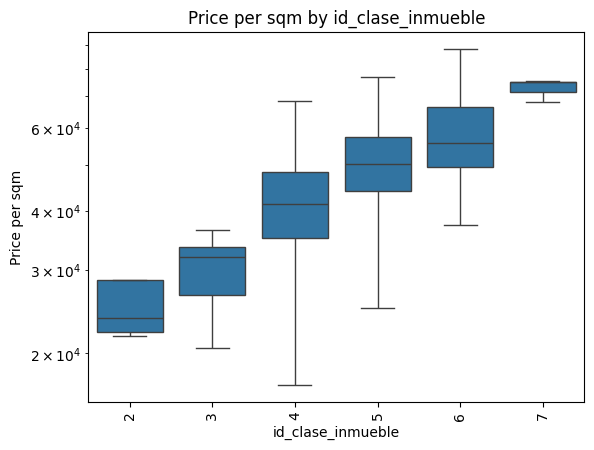

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


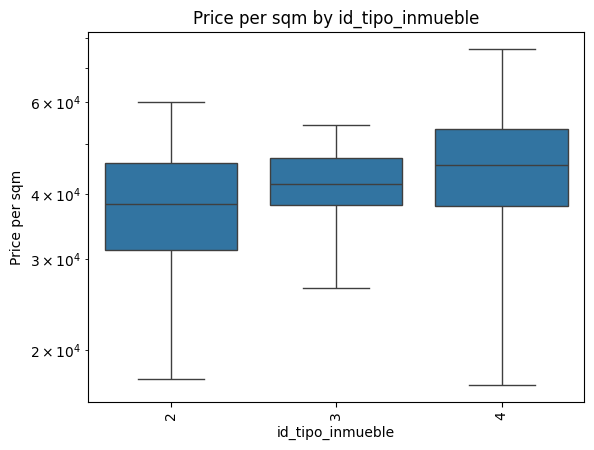

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


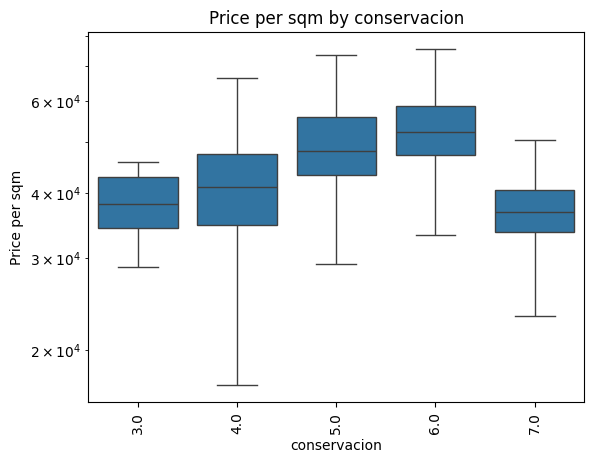

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


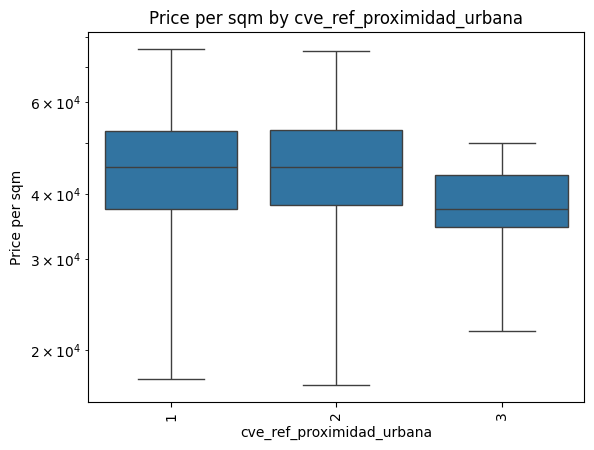

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


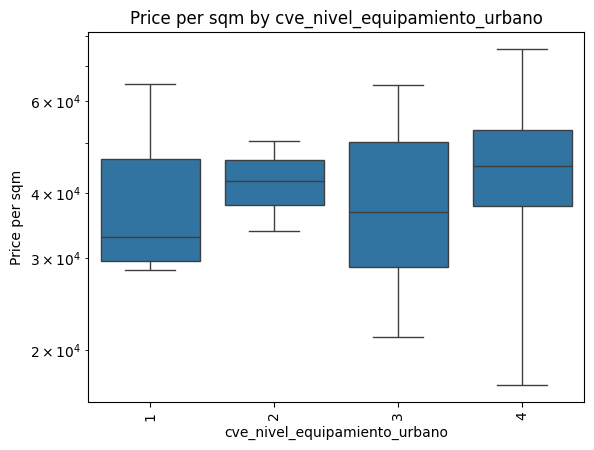

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


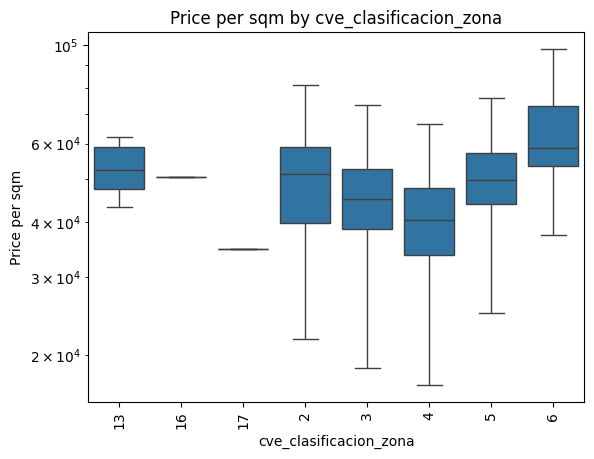

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


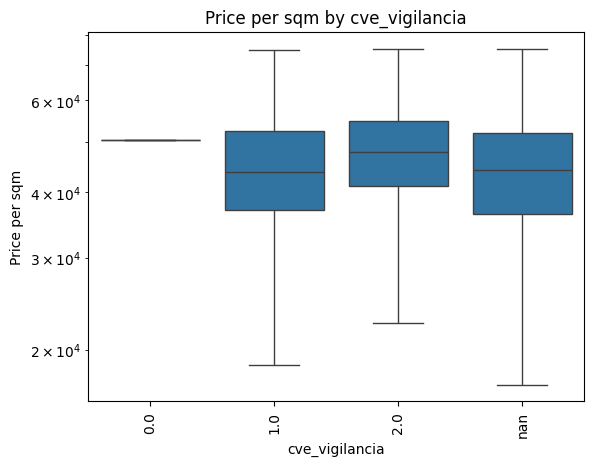

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


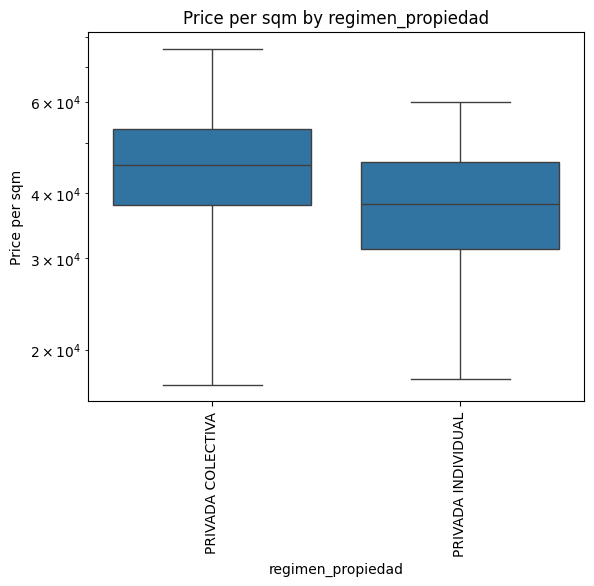

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


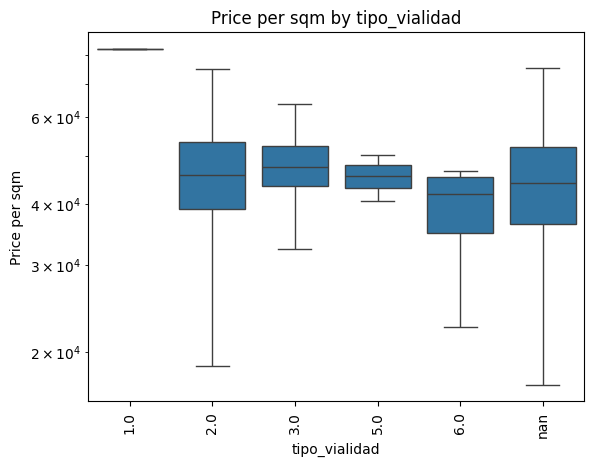

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


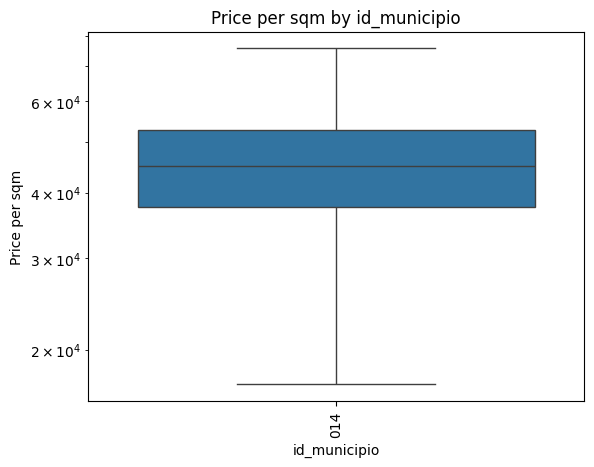

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


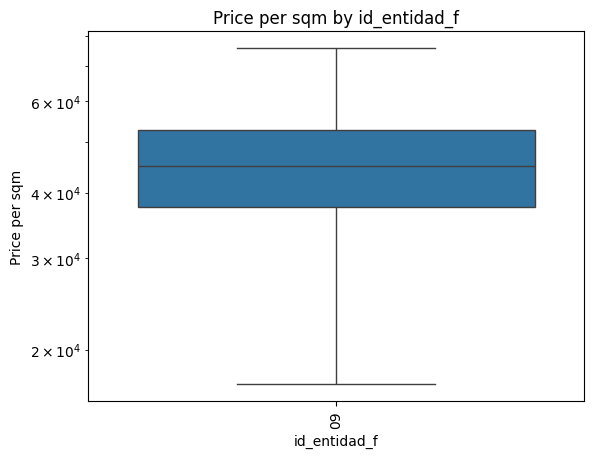

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


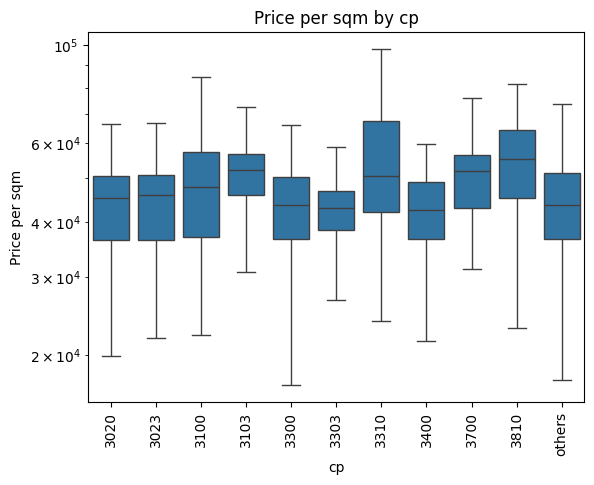

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


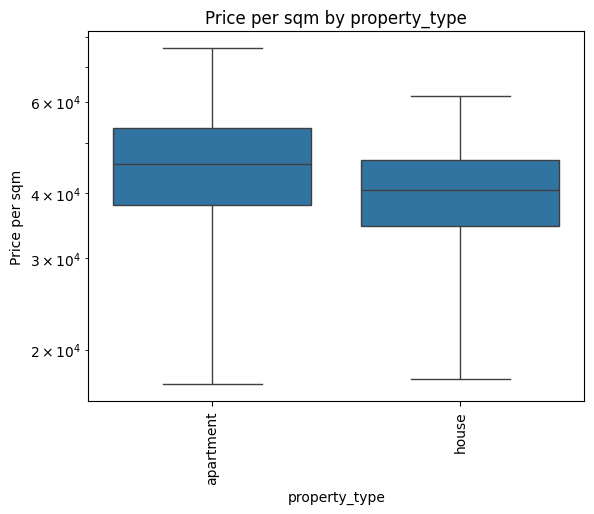

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


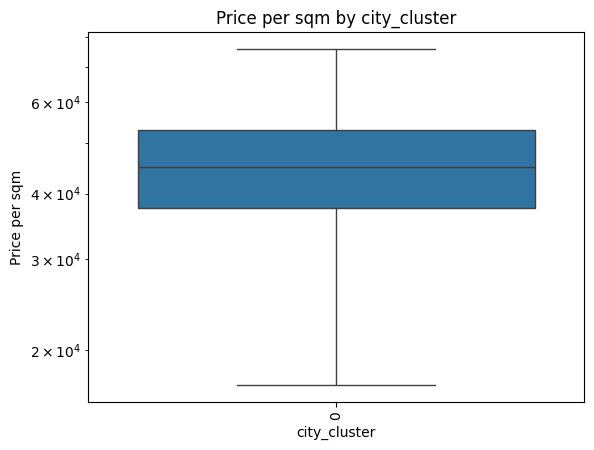

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


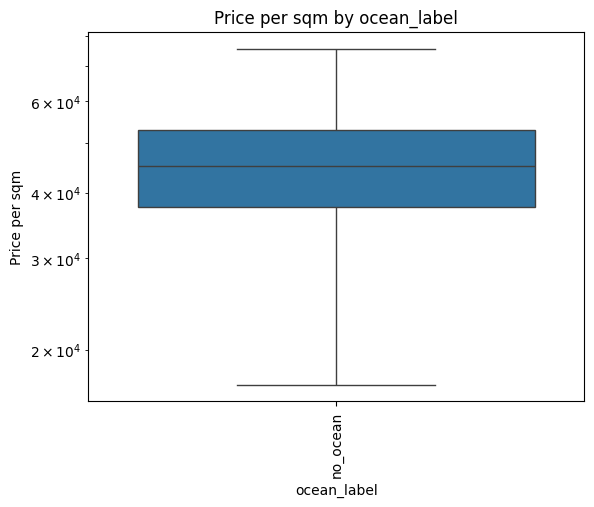

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


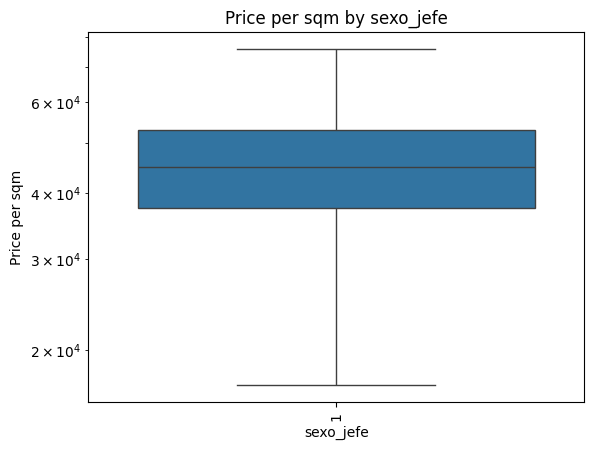

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


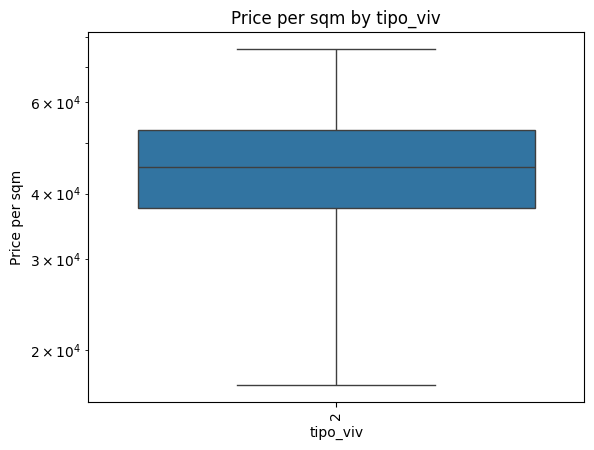

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


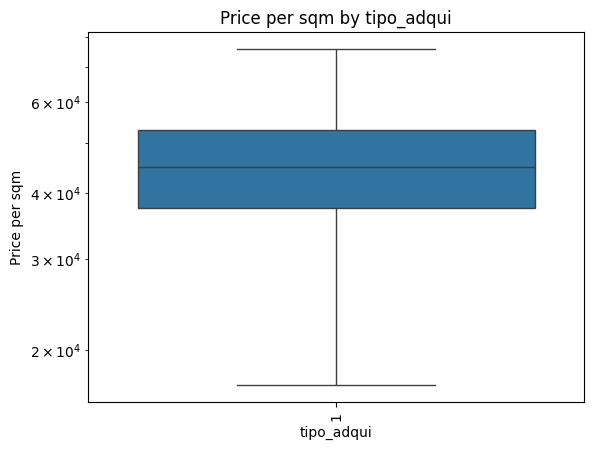

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


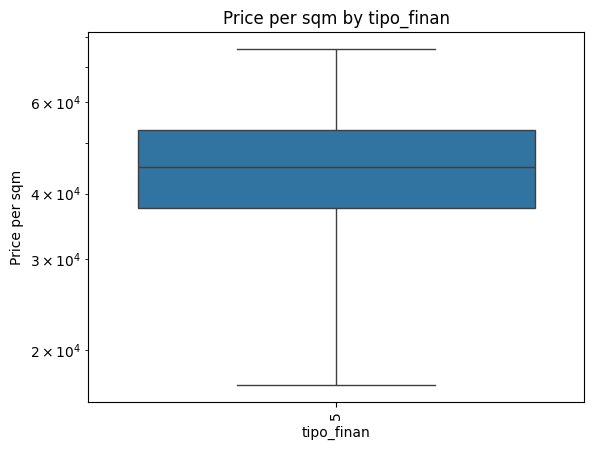

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


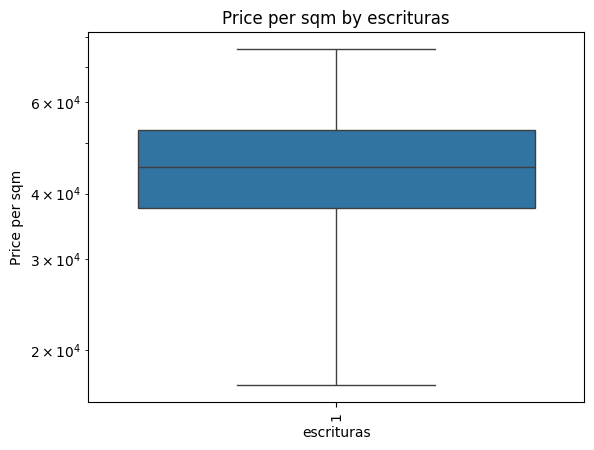

In [68]:
# plot controlling by time and space
columns_categorical = [
    'id_clase_inmueble', 'id_tipo_inmueble',
    'conservacion', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
    'cve_clasificacion_zona', 'cve_vigilancia',
    'regimen_propiedad', 'tipo_vialidad', 'id_municipio', 'id_entidad_f',
    'cp', 'property_type', 'city_cluster', 'ocean_label', 'sexo_jefe',
    'tipo_viv', 'tipo_adqui', 'tipo_finan', 'escrituras'
]

for col in columns_categorical:
    plot_box_plot(gdf_properties_spatiotemporal_control, col, max_values=10)
    

## Continuous

In [20]:
# continuous variables
def plot_scatter_lowess(df, x, y='price_per_sqm', lowess=True, log_x=False, log_y=False, **kwargs,):
    """
    Create a scatter plot of two columns in a DataFrame with a LOWESS curve.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        x (str): The column to plot on the x-axis.
        y (str): The column to plot on the y-axis.
        lowess (bool): Whether to plot a LOWESS curve.
        log_x (bool): Whether to use a log scale on the x-axis.
        log_y (bool): Whether to use a log scale on the y-axis.
        **kwargs: Additional keyword arguments to pass to the scatter plot.

    Returns:
        None: The function does not return a value. It displays the scatter plot.
    """
    # plot
    sns.scatterplot(x=x, y=y, data=df, **kwargs)

    # title
    plt.title(f'{x} vs. {y}')

    # labels
    plt.xlabel(x)
    plt.ylabel(y)

    # log scale
    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # y ticks in thousands and money
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

    # lowess
    if lowess:
        sns.regplot(x=x, y=y, data=df, scatter=False, lowess=True, line_kws={'color': 'red'})

    # show
    plt.show()


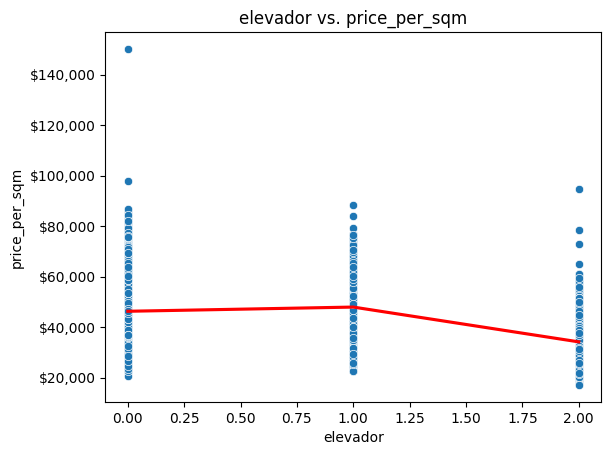

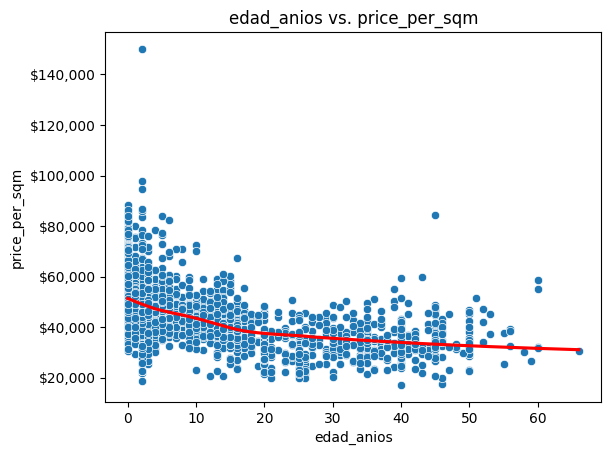

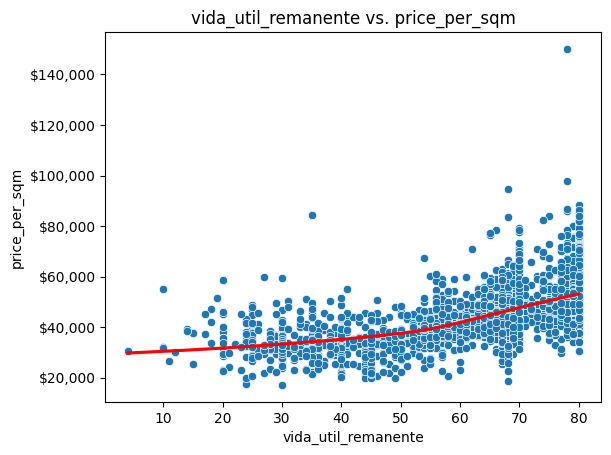

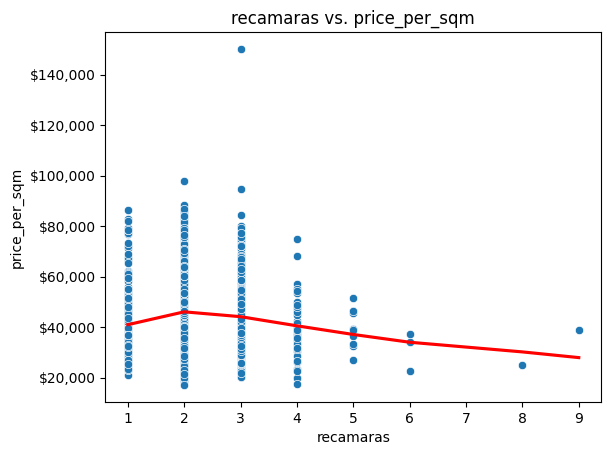

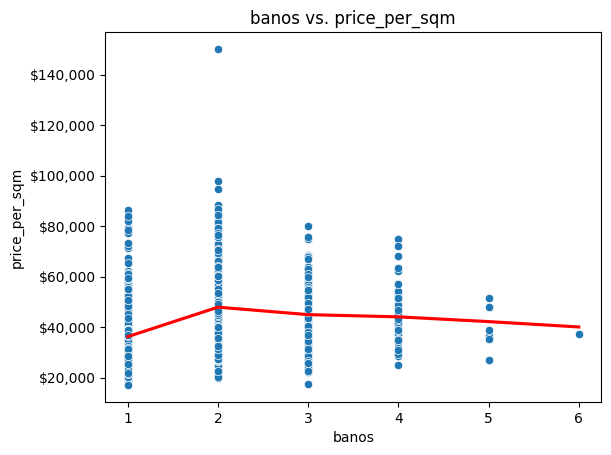

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


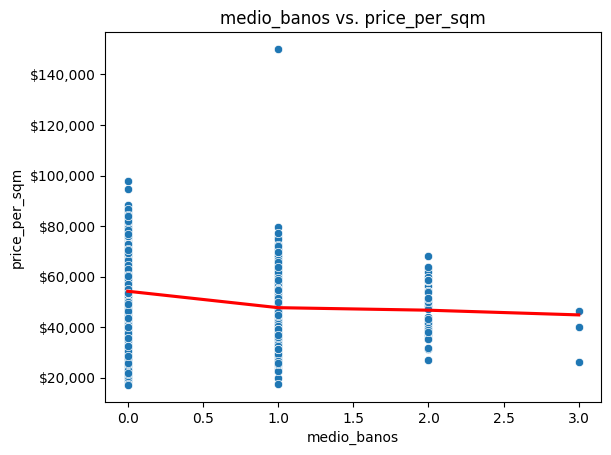

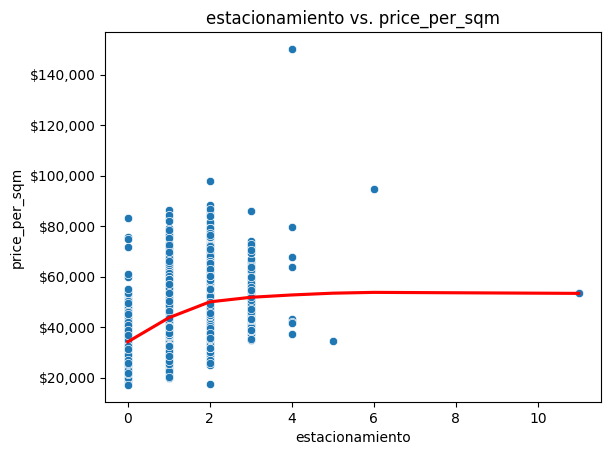

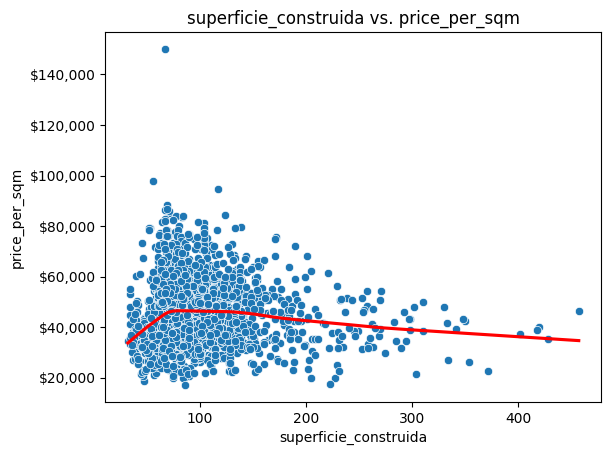

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


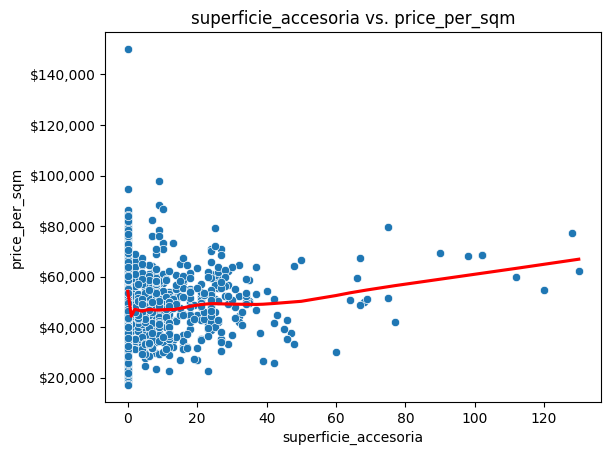

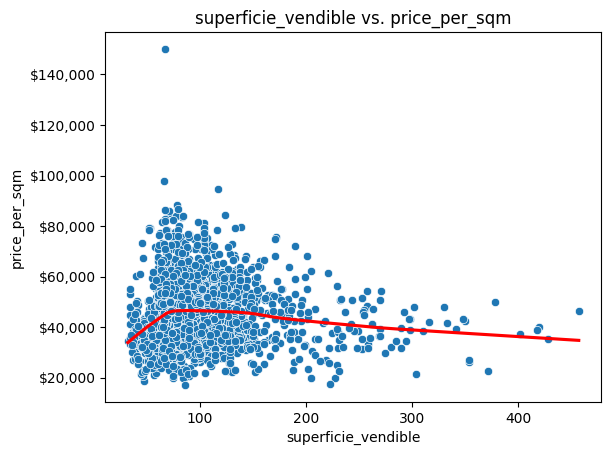

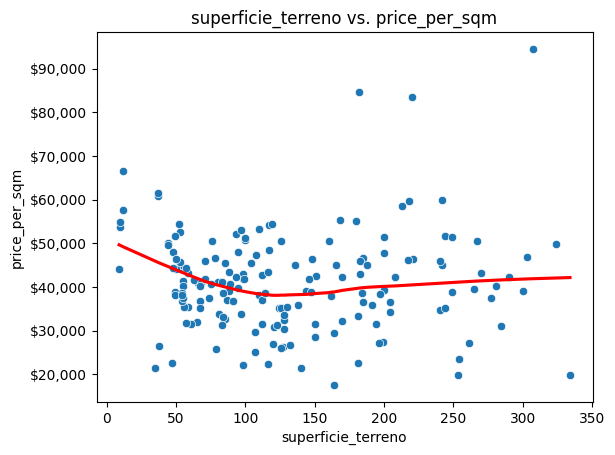

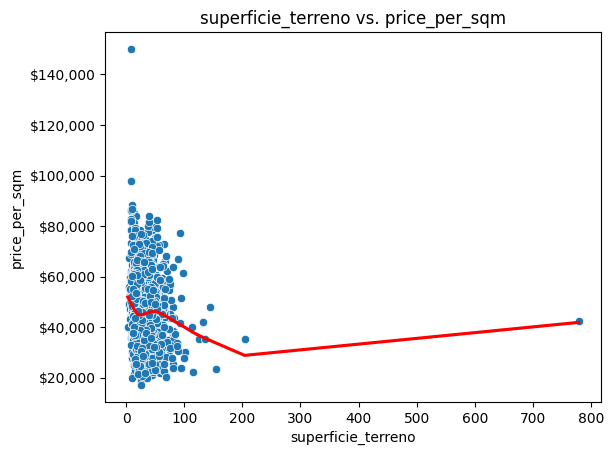

In [90]:
# scatter plot 
columns_continuous = [
    'elevador', 'edad_anios', 'vida_util_remanente', 'recamaras',
    'banos', 'medio_banos', 'estacionamiento',
    'superficie_construida', 'superficie_accesoria', 'superficie_vendible',
]
# control by time & space
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_spatiotemporal_control, col)

# control by time & space and property_type
plot_scatter_lowess(gdf_properties_spatiotemporal_control.query("property_type.eq('house')"), 'superficie_terreno')
plot_scatter_lowess(gdf_properties_spatiotemporal_control.query("property_type.eq('apartment')"), 'superficie_terreno')


/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


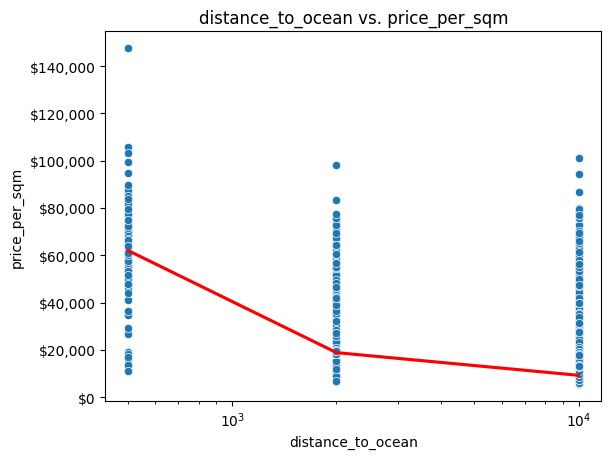

In [113]:
# control by time & space & in beach
plot_scatter_lowess(
    (
        gdf_properties_time_control
        .query("ocean_label.eq('mar_caribe')")
    ),
    'distance_to_ocean',
    log_x=True
    )

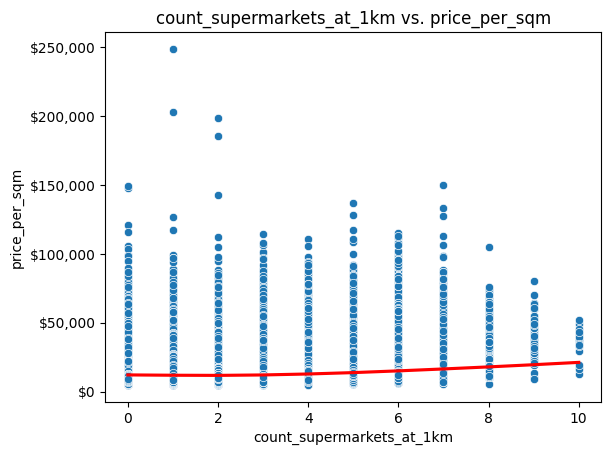

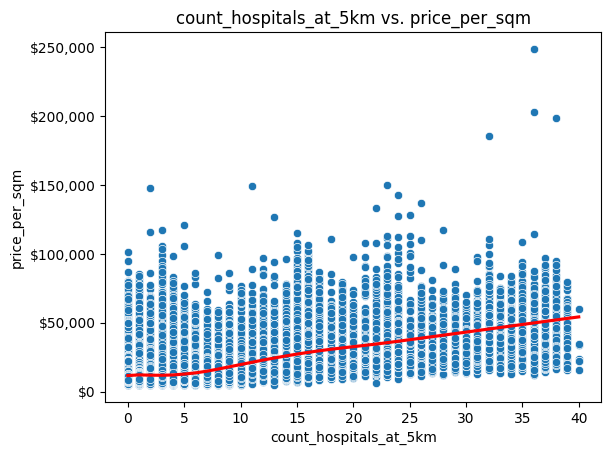

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


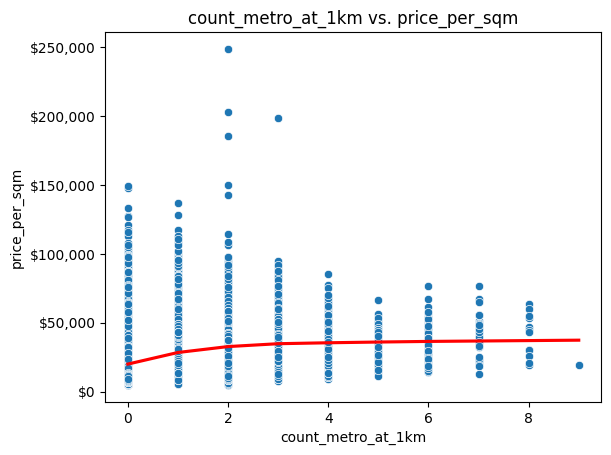

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


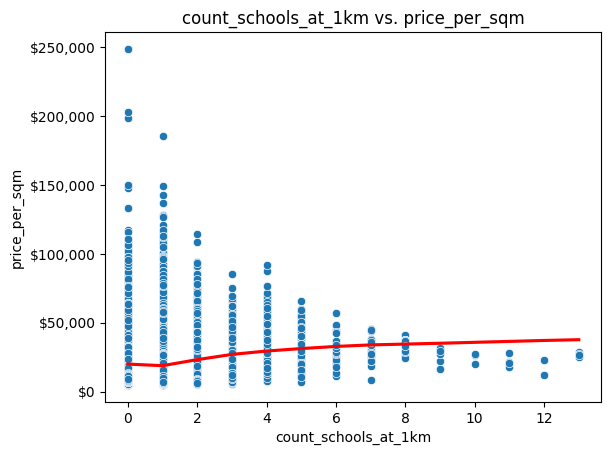

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


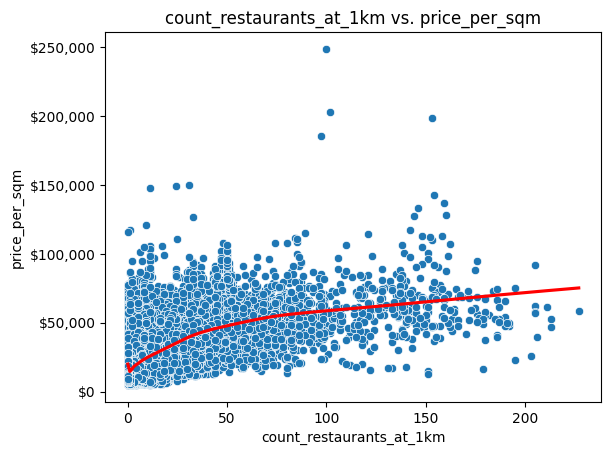

In [74]:
# counts
columns_continuous = gdf_properties_time_control.filter(like='count').columns.tolist()

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_time_control, col)

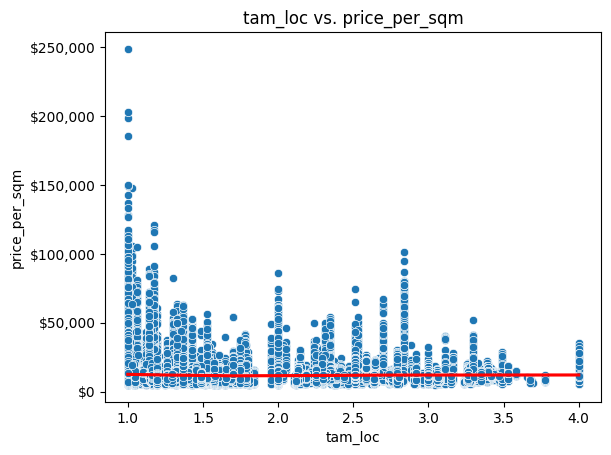

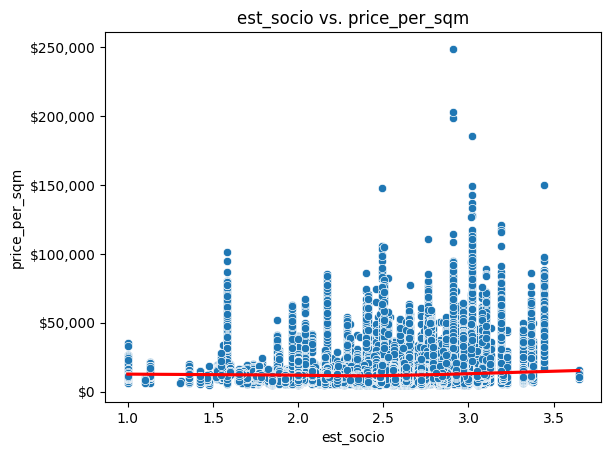

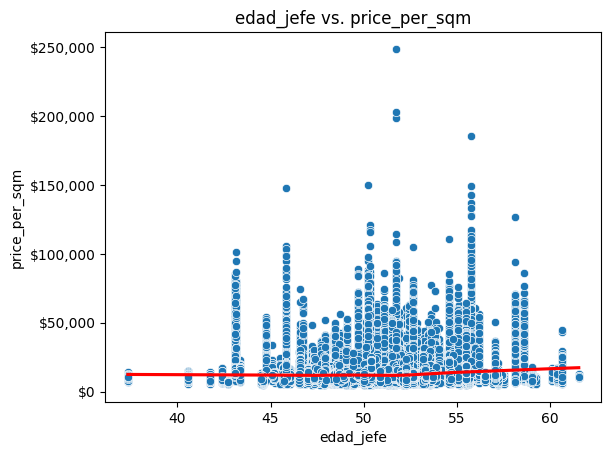

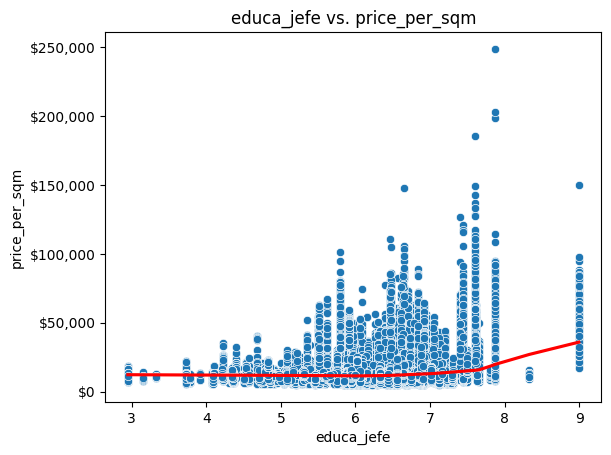

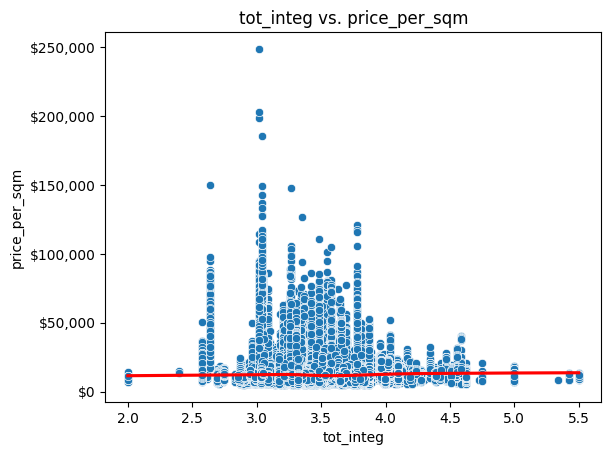

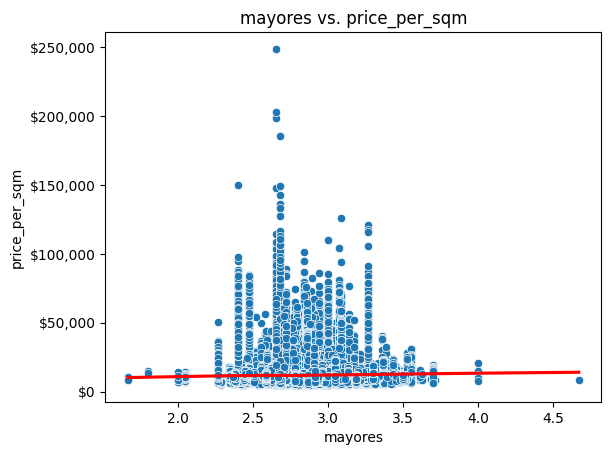

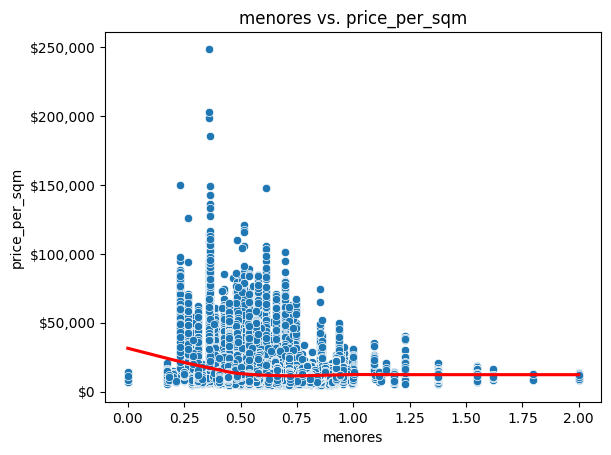

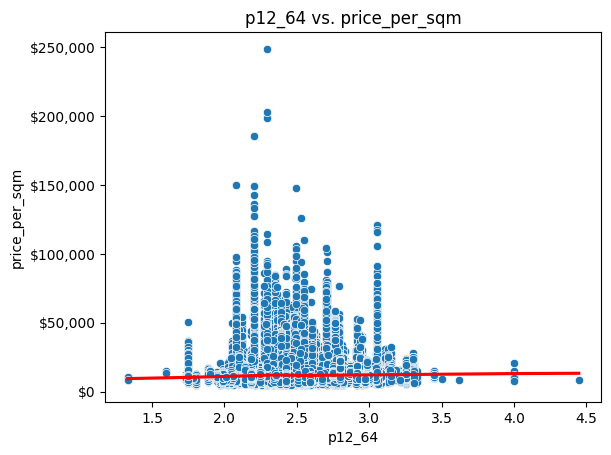

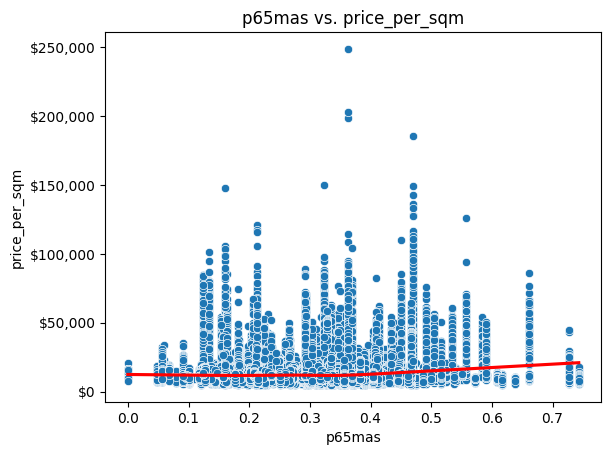

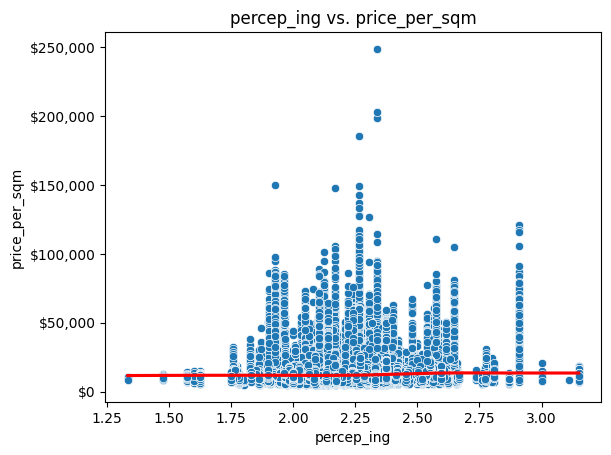

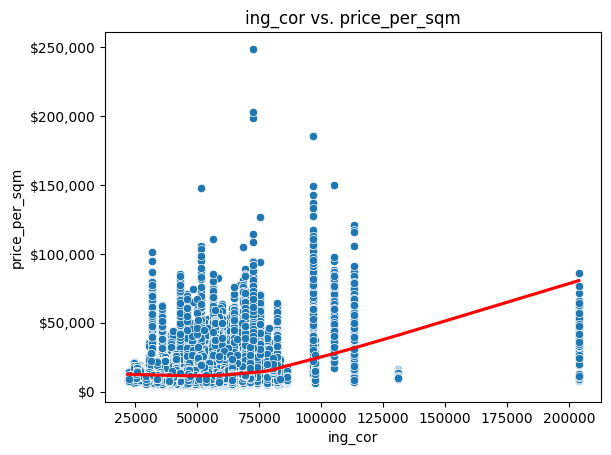

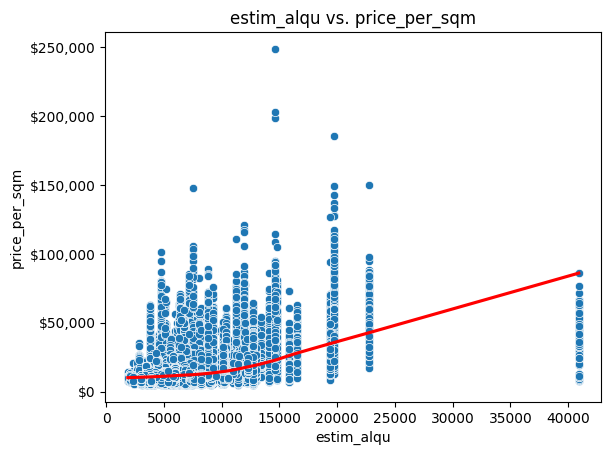

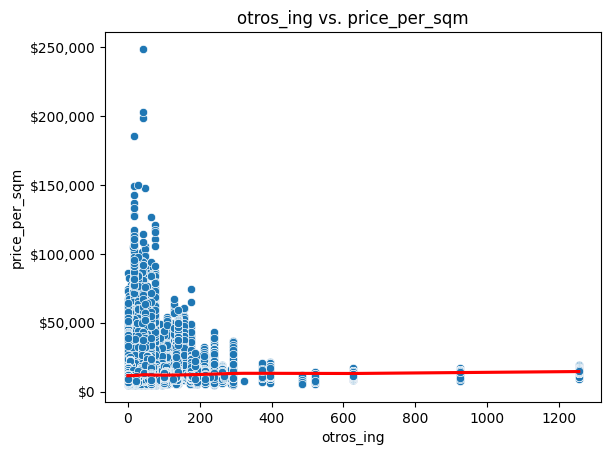

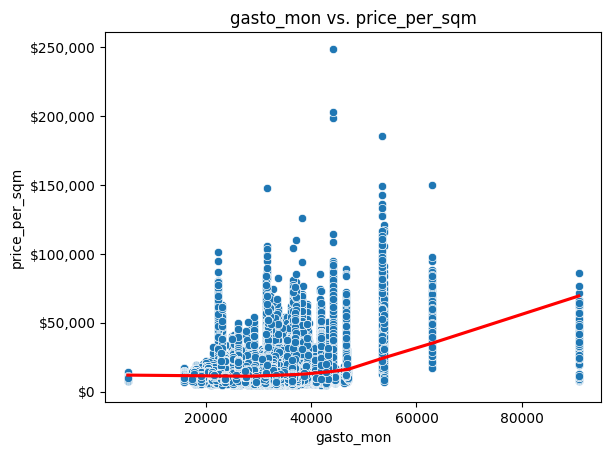

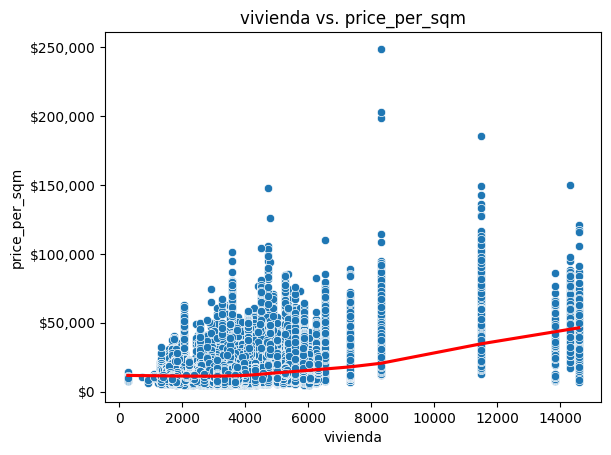

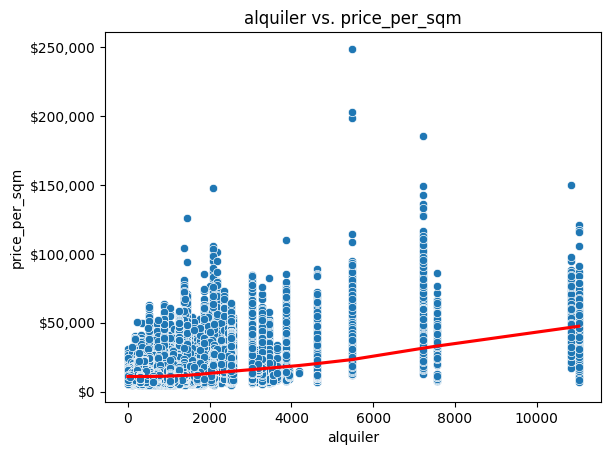

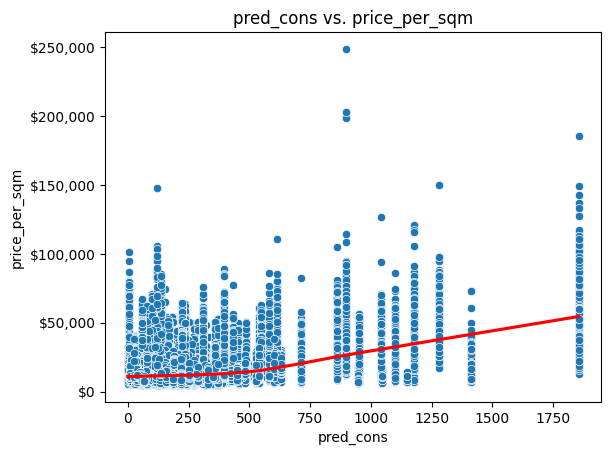

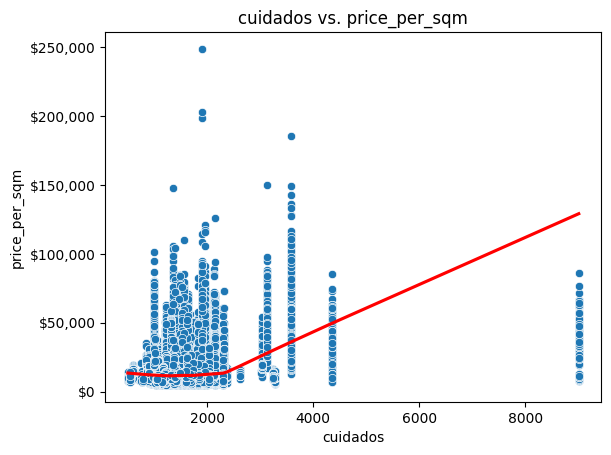

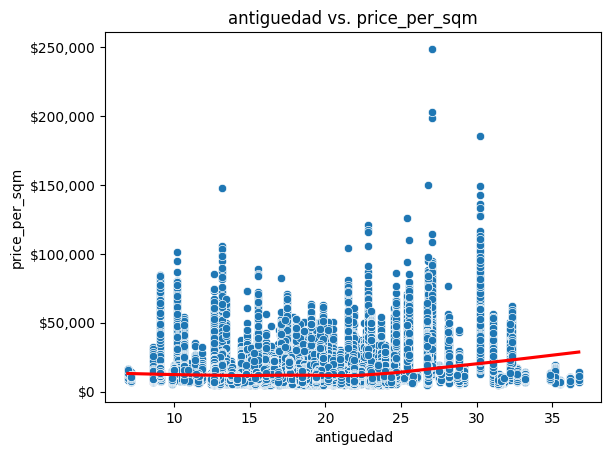

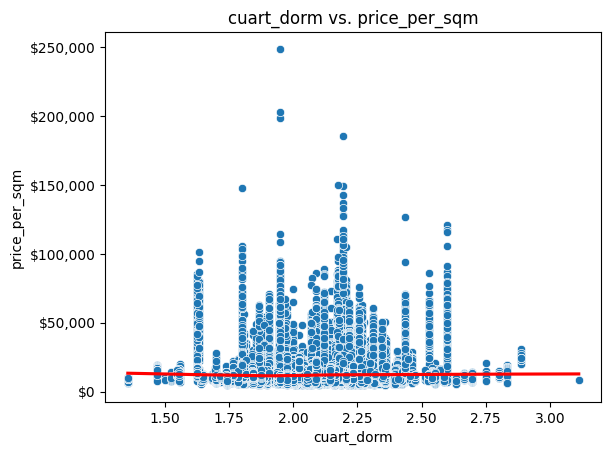

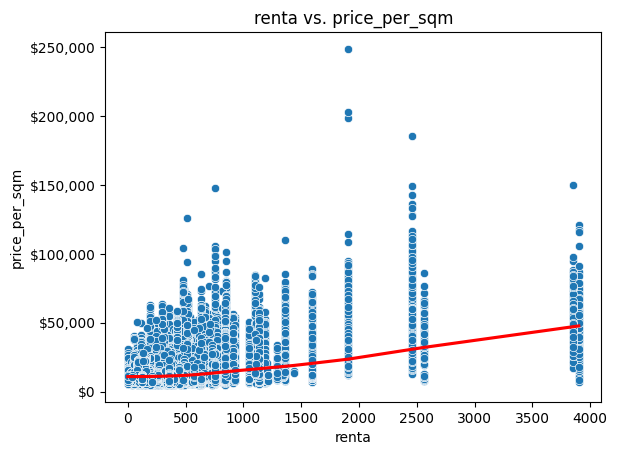

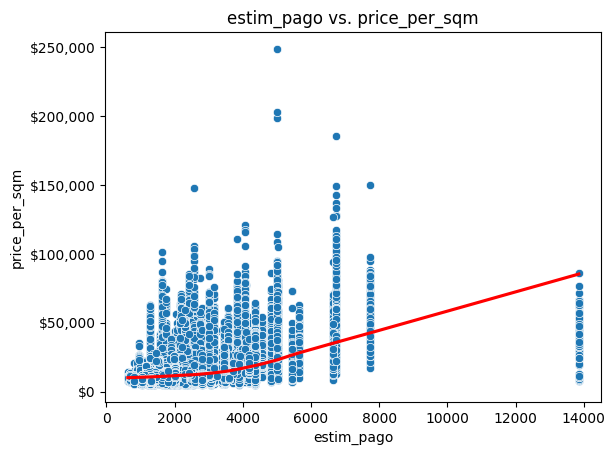

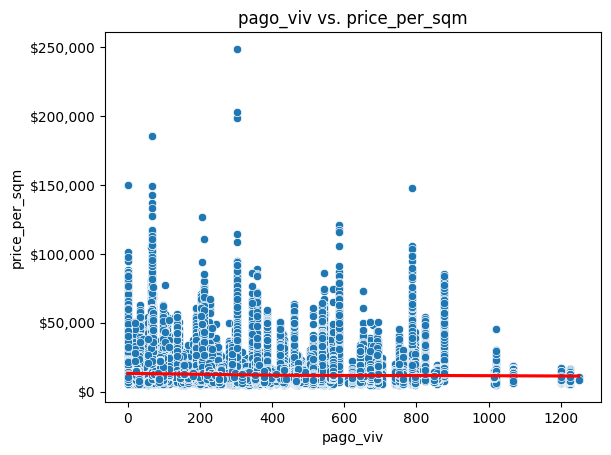

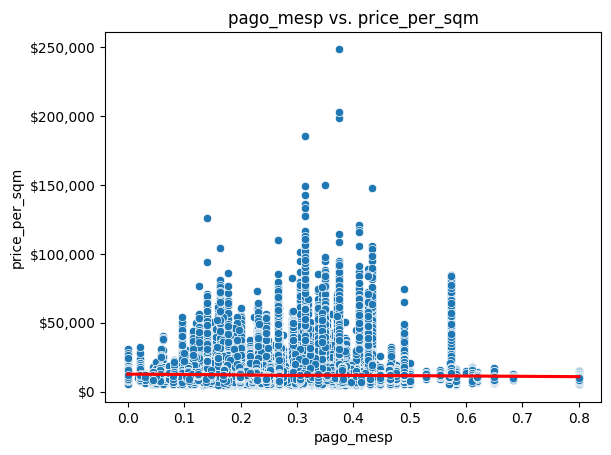

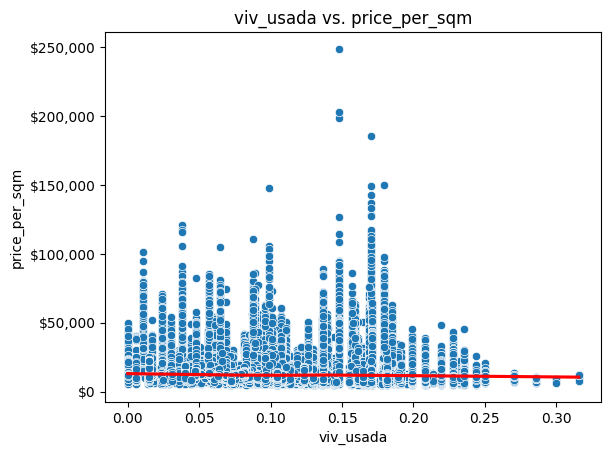

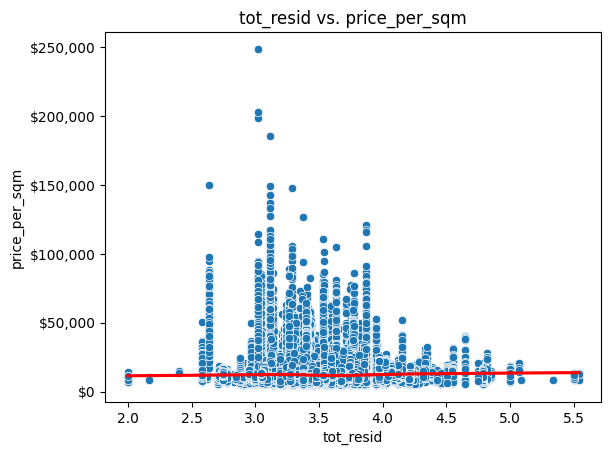

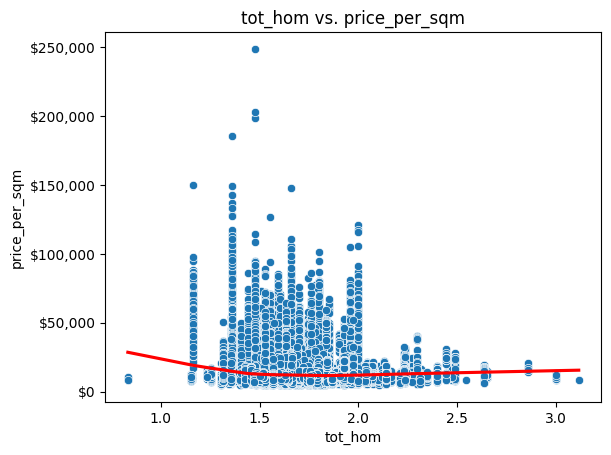

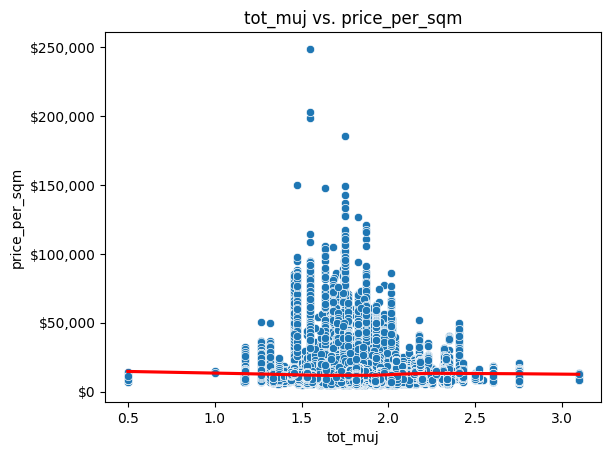

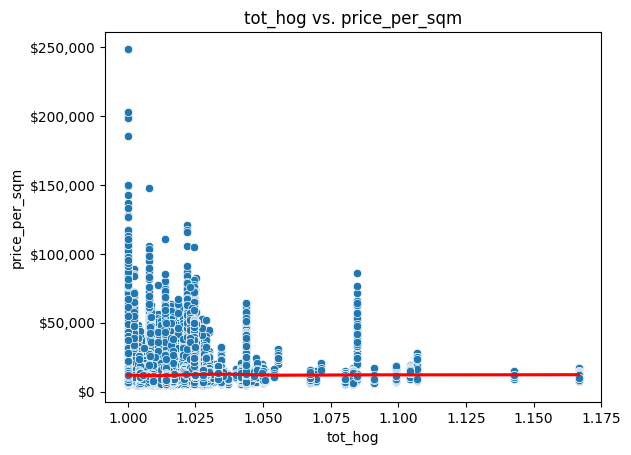

In [23]:
# scatter plot (enigh)
columns_continuous = [
    'tam_loc', 'est_socio', 'edad_jefe', 'educa_jefe', 'tot_integ',
    'mayores', 'menores', 'p12_64', 'p65mas', 'percep_ing', 'ing_cor',
    'estim_alqu', 'otros_ing', 'gasto_mon', 'vivienda', 'alquiler', 'pred_cons',
    'cuidados', 'antiguedad', 'cuart_dorm', 'renta', 'estim_pago', 'pago_viv',
    'pago_mesp', 'viv_usada', 'tot_resid', 'tot_hom', 'tot_muj', 'tot_hog', 
]

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_time_control, col)


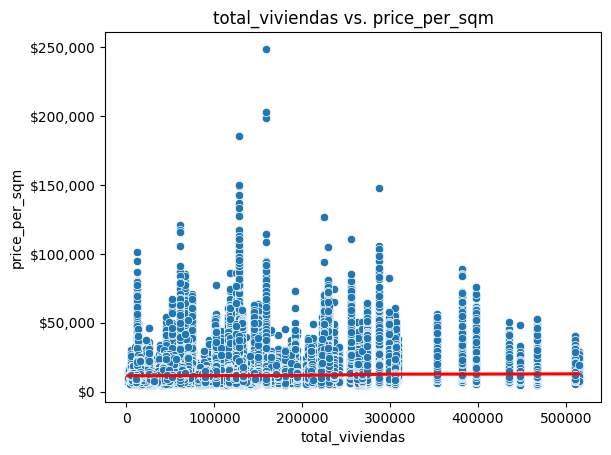

In [26]:
# scatter plot (enigh)
plot_scatter_lowess(gdf_properties_time_control, 'total_viviendas')

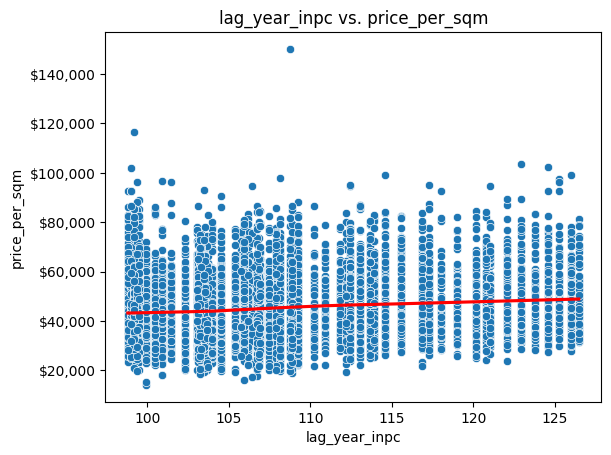

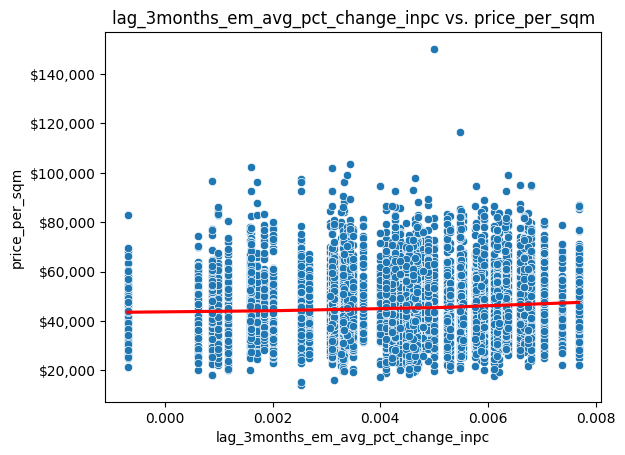

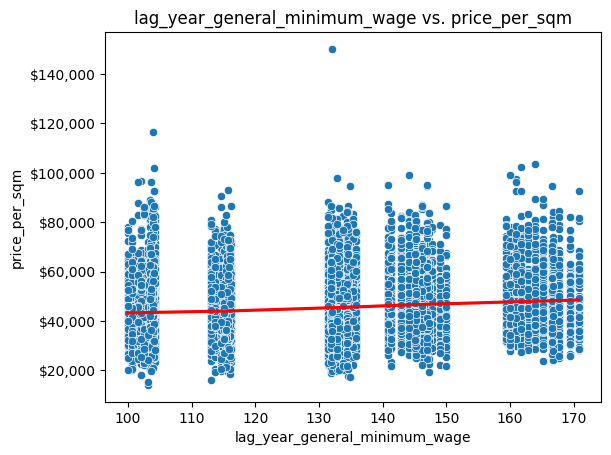

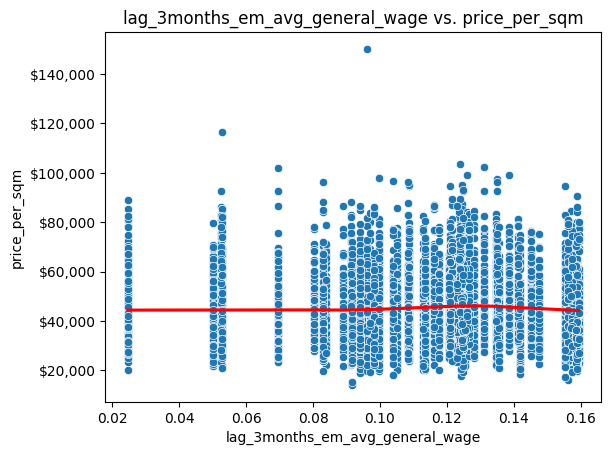

In [21]:
# indexes
columns_continuous = [
    'lag_year_inpc', 'lag_3months_em_avg_pct_change_inpc', 'lag_year_general_minimum_wage',
    'lag_3months_em_avg_general_wage'
]

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_spatial_control, col)


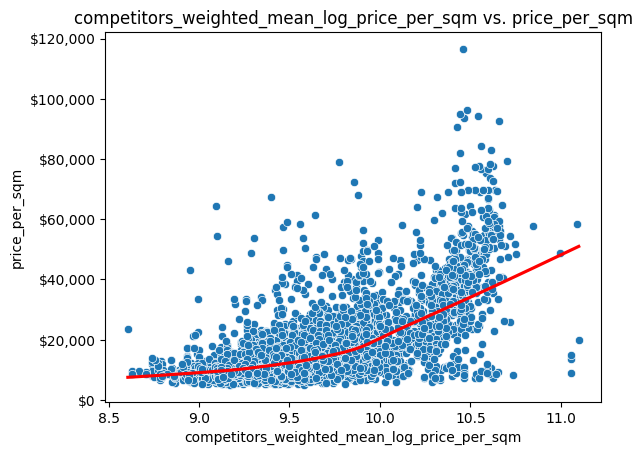

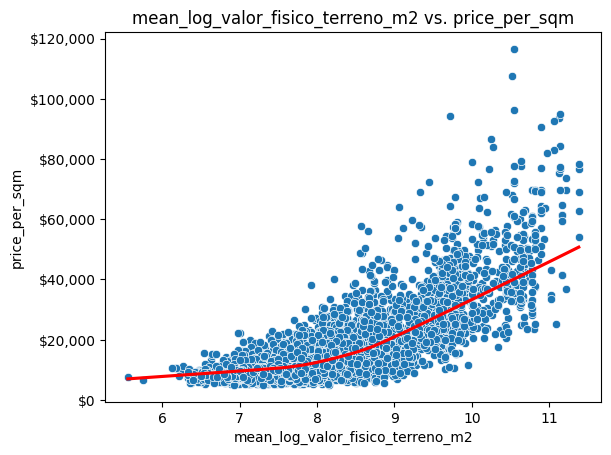

In [28]:
# competitors & mean terrain price
plot_scatter_lowess(gdf_properties.sample(10_000, random_state=42), 'competitors_weighted_mean_log_price_per_sqm')
plot_scatter_lowess(gdf_properties.sample(10_000, random_state=42), 'mean_log_valor_fisico_terreno_m2')

## Spatial Correlation (WIP)

In [57]:
# calculate
table_spatial_corr = (
    gdf_properties
    .query("id_entidad_f.eq('09') & id_municipio.eq('014') & fecha_avaluo.dt.year.eq(2021)")
    .groupby(['hex_id'], as_index=False)
    .agg(
        price_per_sqm=('price_per_sqm', lambda x: x.shape[0] / np.sum(1 / x)),
    )
    .assign(
        geometry=lambda x: x['hex_id'].apply(lambda y: Polygon(h3.h3_to_geo_boundary(y, geo_json=True)))
    )
    .pipe(gpd.GeoDataFrame, crs='EPSG:4326', geometry='geometry')
)

# polygon
table_spatial_corr.explore('price_per_sqm', tiles='cartodbpositron')

## Time Correlation

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_86807/1394136935.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))


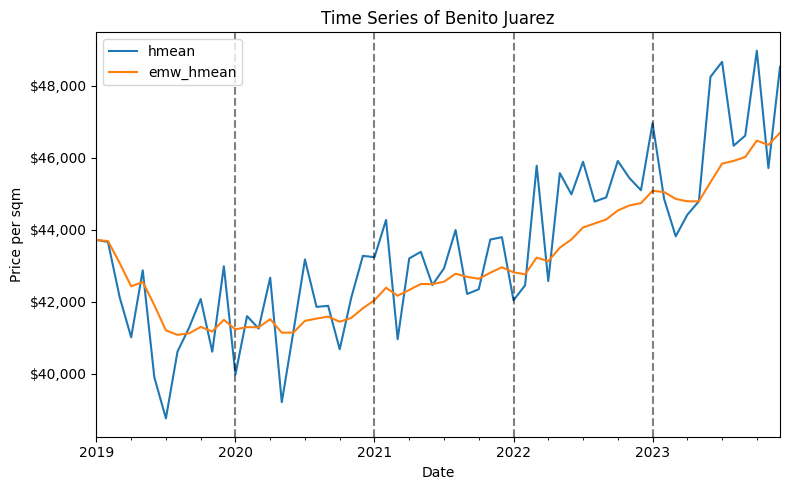

In [41]:
# hmean by month
ts_hmean = (
    gdf_properties
    .query("id_entidad_f.eq('09') & id_municipio.eq('014')")
    .assign(
        month=lambda x: x['fecha_avaluo'].dt.to_period('M')
    )
    .groupby('month')
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['price_per_sqm'])))
    .to_frame('hmean')
    .assign(
        # get exponential moving average
        emw_hmean=lambda x: x['hmean'].ewm(span=12).mean()
    )
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# plot hmean
ts_hmean['hmean'].plot(ax=ax, color='C0', label='hmean')
# plot emw
ts_hmean['emw_hmean'].plot(ax=ax, color='C1', label='emw_hmean')

# add line each beginning of year
for year in range(gdf_properties['fecha_avaluo'].dt.year.min(), gdf_properties['fecha_avaluo'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Benito Juarez")
# labels
plt.xlabel("Date")
plt.ylabel("Price per sqm")

# show legend
plt.legend()

# y ticks in thousands and money
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# tight
plt.tight_layout()

# show
plt.show()

---
# Sandbox

In [58]:
print(gdf_properties.columns.tolist())

['property_id', 'valor_fisico_construccion', 'fecha_avaluo', 'colonia', 'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'elevador', 'niveles', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano', 'valor_mercado', 'valor_concluido_total', 'nivel', 'unidades_rentables', 'edad_anios', 'vida_util_remanente', 'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad', 'tipo_vialidad', 'id_municipio', 'id_entidad_f', 'cp', 'recamaras', 'banos', 'medio_banos', 'estacionamiento', 'superficie_terreno', 'superficie_construida', 'superficie_accesoria', 'superficie_vendible', 'valor_fisico_terreno_m2', 'property_type', 'city_cluster', 'distance_to_ocean', 'ocean_label', 'longitud', 'latitud', 'hex_id', 'count_supermarkets_at_1km', 'count_hospitals_at_5km', 'count_metro_at_1km', 'count_schools_at_1km', 'count_restaurants_at_1km', 'tam_loc', 'est_socio', 'clase_hog', 'sexo_jefe', 'edad_jefe', 'educa_jefe', 'tot_integ', 'mayores', 'menores', 'p12_64', 'p65mas', 'percep_ing', 'i

In [77]:
cont_cols = gdf_properties.select_dtypes(include='number').columns.tolist()
print(cont_cols)

['valor_fisico_construccion', 'elevador', 'niveles', 'valor_mercado', 'valor_concluido_total', 'nivel', 'edad_anios', 'vida_util_remanente', 'recamaras', 'banos', 'medio_banos', 'estacionamiento', 'superficie_terreno', 'superficie_construida', 'superficie_accesoria', 'superficie_vendible', 'valor_fisico_terreno_m2', 'distance_to_ocean', 'longitud', 'latitud', 'count_supermarkets_at_1km', 'count_hospitals_at_5km', 'count_metro_at_1km', 'count_schools_at_1km', 'count_restaurants_at_1km', 'tam_loc', 'est_socio', 'edad_jefe', 'educa_jefe', 'tot_integ', 'mayores', 'menores', 'p12_64', 'p65mas', 'percep_ing', 'ing_cor', 'estim_alqu', 'otros_ing', 'gasto_mon', 'vivienda', 'alquiler', 'pred_cons', 'cuidados', 'antiguedad', 'cuart_dorm', 'renta', 'estim_pago', 'pago_viv', 'pago_mesp', 'viv_usada', 'tot_resid', 'tot_hom', 'tot_muj', 'tot_hog', 'total_viviendas', 'lag_year_inpc', 'lag_3months_em_avg_pct_change_inpc', 'lag_year_general_minimum_wage', 'lag_3months_em_avg_general_wage', 'competitors

In [98]:
gdf_properties['property_type'].value_counts()

property_type
house        645566
apartment    207347
Name: count, dtype: int64

In [105]:
gdf_properties_time_control['ocean_label'].value_counts()

ocean_label
no_ocean               164350
golfo_de_mexico         16581
golfo_de_california     12984
mar_caribe               6504
pacifico_tropical        4538
pacifico_noroeste         660
Name: count, dtype: int64